In [2]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import exchange_calendars as ecals 
import datetime

XKRX = ecals.get_calendar("XKRX",side="left")

# csv파일 불러오기

In [3]:
증권뉴스=pd.read_csv('./증권4개년 뉴스 전처리.csv')
증권뉴스

date                                 제목                 작성시간  \
0        2017-01-01                   인사 국민연금공단 기금운용본부  2017-01-01 22:53:00   
1        2017-01-01            국민연금 기금운용본부 운용전략실장에 이수철  2017-01-01 21:37:00   
2        2017-01-01            금리 오르면 사모펀드에 투자기회 늘어날 것  2017-01-01 19:45:00   
3        2017-01-01           마켓인사이트 KB증권 JW바이오 지분  인수  2017-01-01 19:41:00   
4        2017-01-01          증권사 이달부터 ELS 헤지자산 구분 관리해야  2017-01-01 19:39:00   
...             ...                                ...                  ...   
1461866  2020-12-31         한국항공우주 국방과학연구소와 억 규모 계약 체결  2020-12-31 13:37:00   
1461867  2020-12-31         사라지지 않은 코로나백신치료제 더 오른다 유망주  2020-12-31 13:34:00   
1461868  2020-12-31  동학개미 덕에 두 배 뛴 반도체슈퍼사이클로 더 간다  유망주  2020-12-31 13:34:00   
1461869  2020-12-31             채권 전문가  내년 채권 금리 보합 전망  2020-12-31 13:33:00   
1461870  2020-12-31                           인사KR투자증권  2020-12-31 13:29:00   

                                                       형태소  점수      date.1  
0               ['인사', '국민', '연금', '공단', '기금', '운용', '본부']   0  2017-01-01  
1        ['국민', '연금', '기금', '운용', '본부', '운용', '전략', '실장...   0  2017-01-01  
2        ['금리', '오르', '면', '사모', '펀드', '에', '투자', '기회',...   1  2017-01-01  
3        ['마켓', '인사이트', 'KB', '증권', 'JW', '바이오', '지분', ...   1  2017-01-01  
4        ['증권사', '이달', '부터', 'ELS', '헤지', '자산', '구분', '...   0  2017-01-01  
...                                                    ...  ..         ...  
1461866  ['한국', '항공우주', '국방과학연구소', '와', '억', '규모', '계약'...   1  2020-12-31  
1461867  ['사라지', '지', '않', '은', '코로나', '백신', '치료제', '더'...   1  2020-12-31  
1461868  ['동학', '개미', '덕', '에', '두', '배', '뛴', '반도체', '...   1  2020-12-31  
1461869        ['채권', '전문가', '내년', '채권', '금리', '보합', '전망']   0  2020-12-31  
1461870                           ['인사', 'KR', '투자', '증권']   0  2020-12-31  

[1461871 rows x 6 columns]

# * finance data reader 라이브러리를 이용하여 기간별 코스피 정보 담아오기
# * 코스피 개장일자만 리스트로 담아오기

In [4]:
# 코스피 개장일만 리스트로 담기 
df = fdr.DataReader('KS11', '2017','2021')
kspi_list=df.index.strftime('%Y-%m-%d').tolist()
kspi_list

['2017-01-02',
 '2017-01-03',
 '2017-01-04',
 '2017-01-05',
 '2017-01-06',
 '2017-01-09',
 '2017-01-10',
 '2017-01-11',
 '2017-01-12',
 '2017-01-13',
 '2017-01-16',
 '2017-01-17',
 '2017-01-18',
 '2017-01-19',
 '2017-01-20',
 '2017-01-23',
 '2017-01-24',
 '2017-01-25',
 '2017-01-26',
 '2017-01-31',
 '2017-02-01',
 '2017-02-02',
 '2017-02-03',
 '2017-02-06',
 '2017-02-07',
 '2017-02-08',
 '2017-02-09',
 '2017-02-10',
 '2017-02-13',
 '2017-02-14',
 '2017-02-15',
 '2017-02-16',
 '2017-02-17',
 '2017-02-20',
 '2017-02-21',
 '2017-02-22',
 '2017-02-23',
 '2017-02-24',
 '2017-02-27',
 '2017-02-28',
 '2017-03-02',
 '2017-03-03',
 '2017-03-06',
 '2017-03-07',
 '2017-03-08',
 '2017-03-09',
 '2017-03-10',
 '2017-03-13',
 '2017-03-14',
 '2017-03-15',
 '2017-03-16',
 '2017-03-17',
 '2017-03-20',
 '2017-03-21',
 '2017-03-22',
 '2017-03-23',
 '2017-03-24',
 '2017-03-27',
 '2017-03-28',
 '2017-03-29',
 '2017-03-30',
 '2017-03-31',
 '2017-04-03',
 '2017-04-04',
 '2017-04-05',
 '2017-04-06',
 '2017-04-

In [5]:
df

Close     Open     High      Low        Volume  Change
Date                                                                
2017-01-02  2026.16  2022.23  2031.79  2015.68  2.298800e+08 -0.0001
2017-01-03  2043.97  2034.31  2044.07  2028.47  2.681300e+08  0.0088
2017-01-04  2045.64  2046.29  2046.29  2040.61  3.714900e+08  0.0008
2017-01-05  2041.95  2045.52  2046.50  2039.49  5.413400e+08 -0.0018
2017-01-06  2049.12  2048.11  2051.84  2045.66  4.553500e+08  0.0035
...             ...      ...      ...      ...           ...     ...
2020-12-23  2759.82  2737.74  2769.08  2716.28  1.120000e+09  0.0096
2020-12-24  2806.86  2762.60  2812.16  2762.60  1.030000e+09  0.0170
2020-12-28  2808.60  2820.95  2834.59  2799.56  1.010000e+09  0.0006
2020-12-29  2820.51  2810.55  2823.44  2792.06  1.050000e+09  0.0042
2020-12-30  2873.47  2820.36  2878.21  2809.35  1.070000e+09  0.0188

[981 rows x 6 columns]

# 개장일에 해당하는 뉴스의 감성점수 컬럼에 입력

In [6]:
# 개장일에 해당하는 날짜의 뉴스기사마다 라벨링 되어 있는 감성점수(-1,0,1)의 총합을 감성어 점수칼럼에 입력

df['감성어점수']=np.nan
# df.reindex(columns=df.columns.tolist()+['감성어점수'])

for i in range(len(kspi_list)):
    당일종가=kspi_list[i]+' 15:30:00'
    전일종가=XKRX.previous_open(kspi_list[i]).strftime('%Y-%m-%d %15:%31:00')
    감성어점수=sum(증권뉴스[(증권뉴스['작성시간']<당일종가)&(증권뉴스['작성시간']>전일종가)].점수)
    df.iloc[i,6]=감성어점수
#     print(i,'번째를 실행했습니다.')
df

Close     Open     High      Low        Volume  Change  감성어점수
Date                                                                       
2017-01-02  2026.16  2022.23  2031.79  2015.68  2.298800e+08 -0.0001  245.0
2017-01-03  2043.97  2034.31  2044.07  2028.47  2.681300e+08  0.0088  372.0
2017-01-04  2045.64  2046.29  2046.29  2040.61  3.714900e+08  0.0008  425.0
2017-01-05  2041.95  2045.52  2046.50  2039.49  5.413400e+08 -0.0018  344.0
2017-01-06  2049.12  2048.11  2051.84  2045.66  4.553500e+08  0.0035  344.0
...             ...      ...      ...      ...           ...     ...    ...
2020-12-23  2759.82  2737.74  2769.08  2716.28  1.120000e+09  0.0096  308.0
2020-12-24  2806.86  2762.60  2812.16  2762.60  1.030000e+09  0.0170  360.0
2020-12-28  2808.60  2820.95  2834.59  2799.56  1.010000e+09  0.0006  531.0
2020-12-29  2820.51  2810.55  2823.44  2792.06  1.050000e+09  0.0042  316.0
2020-12-30  2873.47  2820.36  2878.21  2809.35  1.070000e+09  0.0188  328.0

[981 rows x 7 columns]

# 개장일에 해당하는 감성어 변화율을 컬럼에 입력

In [7]:
# 개장일에 해당하는 감성어 비율을 감성어_change 컬럼에 입력
# 감성어 비율 = (당일 감성어점수- 전일 감성어 점수) / 전일 감성어 점수 

df['감성어_Change']=np.nan

for i in range(len(kspi_list)):
    try:
        감성어비율 = (df.iloc[i+1,6]-df.iloc[i,6])/df.iloc[i,6]
        df.iloc[i+1,7]=감성어비율
    except:
        pass
    
#     print(i,'번째를 실행했습니다.')
df

Close     Open     High      Low        Volume  Change  감성어점수  \
Date                                                                          
2017-01-02  2026.16  2022.23  2031.79  2015.68  2.298800e+08 -0.0001  245.0   
2017-01-03  2043.97  2034.31  2044.07  2028.47  2.681300e+08  0.0088  372.0   
2017-01-04  2045.64  2046.29  2046.29  2040.61  3.714900e+08  0.0008  425.0   
2017-01-05  2041.95  2045.52  2046.50  2039.49  5.413400e+08 -0.0018  344.0   
2017-01-06  2049.12  2048.11  2051.84  2045.66  4.553500e+08  0.0035  344.0   
...             ...      ...      ...      ...           ...     ...    ...   
2020-12-23  2759.82  2737.74  2769.08  2716.28  1.120000e+09  0.0096  308.0   
2020-12-24  2806.86  2762.60  2812.16  2762.60  1.030000e+09  0.0170  360.0   
2020-12-28  2808.60  2820.95  2834.59  2799.56  1.010000e+09  0.0006  531.0   
2020-12-29  2820.51  2810.55  2823.44  2792.06  1.050000e+09  0.0042  316.0   
2020-12-30  2873.47  2820.36  2878.21  2809.35  1.070000e+09  0.0188  328.0   

            감성어_Change  
Date                    
2017-01-02         NaN  
2017-01-03    0.518367  
2017-01-04    0.142473  
2017-01-05   -0.190588  
2017-01-06    0.000000  
...                ...  
2020-12-23    0.316239  
2020-12-24    0.168831  
2020-12-28    0.475000  
2020-12-29   -0.404896  
2020-12-30    0.037975  

[981 rows x 8 columns]

# 감성어의 기간별 변화율을 컬럼에 입력

In [8]:
# 감성어의 5일 비율을 컬럼에 담아냄

df['감성어5일_Change']=np.nan


for i in range(len(kspi_list)):
    try:
        감성어5일비율 = (df.iloc[i+4,6]-df.iloc[i,6])/df.iloc[i,6]
        df.iloc[i+4,8]=감성어5일비율
    except:
        pass
    
df감성어5일변화율=df.copy()
df감성어5일변화율.dropna(inplace=True)
df감성어5일변화율.corr()

Close      Open      High       Low    Volume    Change  \
Close         1.000000  0.995631  0.997698  0.998388 -0.010650  0.080267   
Open          0.995631  1.000000  0.998514  0.997602 -0.009559  0.009791   
High          0.997698  0.998514  1.000000  0.997332  0.004483  0.033494   
Low           0.998388  0.997602  0.997332  1.000000 -0.026664  0.050351   
Volume       -0.010650 -0.009559  0.004483 -0.026664  1.000000  0.023375   
Change        0.080267  0.009791  0.033494  0.050351  0.023375  1.000000   
감성어점수         0.165106  0.152378  0.151843  0.167259 -0.090028  0.363818   
감성어_Change    0.022771  0.017883  0.018727  0.021250  0.005343  0.079011   
감성어5일_Change  0.042488  0.039777  0.040249  0.041810  0.027538  0.101143   

                 감성어점수  감성어_Change  감성어5일_Change  
Close         0.165106    0.022771      0.042488  
Open          0.152378    0.017883      0.039777  
High          0.151843    0.018727      0.040249  
Low           0.167259    0.021250      0.041810  
Volume       -0.090028    0.005343      0.027538  
Change        0.363818    0.079011      0.101143  
감성어점수         1.000000    0.123002      0.139811  
감성어_Change    0.123002    1.000000      0.028359  
감성어5일_Change  0.139811    0.028359      1.000000

In [9]:
# 감성어의 10일 비율을 컬럼에 담아냄


df['감성어10일_Change']=np.nan

for i in range(len(kspi_list)):
    try:
        감성어10일비율 = (df.iloc[i+9,6]-df.iloc[i,6])/df.iloc[i,6]
        df.iloc[i+9,9]=감성어10일비율
    except:
        pass
    
df감성어10일변화율=df.copy()
df감성어10일변화율.dropna(inplace=True)
df감성어10일변화율.corr()

Close      Open      High       Low    Volume    Change  \
Close          1.000000  0.995623  0.997695  0.998388 -0.011989  0.082002   
Open           0.995623  1.000000  0.998516  0.997600 -0.010988  0.011519   
High           0.997695  0.998516  1.000000  0.997338  0.003119  0.035182   
Low            0.998388  0.997600  0.997338  1.000000 -0.028047  0.052077   
Volume        -0.011989 -0.010988  0.003119 -0.028047  1.000000  0.024324   
Change         0.082002  0.011519  0.035182  0.052077  0.024324  1.000000   
감성어점수          0.163993  0.151190  0.150647  0.166161 -0.090516  0.364824   
감성어_Change     0.022701  0.017811  0.018646  0.021186  0.005364  0.079001   
감성어5일_Change   0.042514  0.039800  0.040277  0.041830  0.027543  0.101233   
감성어10일_Change  0.012239  0.011673  0.011199  0.014540  0.003006  0.065630   

                  감성어점수  감성어_Change  감성어5일_Change  감성어10일_Change  
Close          0.163993    0.022701      0.042514       0.012239  
Open           0.151190    0.017811      0.039800       0.011673  
High           0.150647    0.018646      0.040277       0.011199  
Low            0.166161    0.021186      0.041830       0.014540  
Volume        -0.090516    0.005364      0.027543       0.003006  
Change         0.364824    0.079001      0.101233       0.065630  
감성어점수          1.000000    0.122973      0.139795       0.046787  
감성어_Change     0.122973    1.000000      0.028348       0.033131  
감성어5일_Change   0.139795    0.028348      1.000000       0.021386  
감성어10일_Change  0.046787    0.033131      0.021386       1.000000

In [10]:
# 감성어의 20일 비율을 감성어 20일 비율 컬럼에 담아냄
# 감성어 20일비율 = (20일 전 감성어 점수 - 당일 감성어 점수 )/ 당일 감성어 점수 

df['감성어20일_Change']=np.nan

for i in range(len(kspi_list)):
    try:
        감성어20일비율 = (df.iloc[i+19,6]-df.iloc[i,6])/df.iloc[i,6]
        df.iloc[i+19,10]=감성어20일비율
    except:
        pass
    
df감성어20일변화율=df.copy()
df감성어20일변화율.dropna(inplace=True)
df감성어20일변화율.corr()

Close      Open      High       Low    Volume    Change  \
Close          1.000000  0.995597  0.997682  0.998383 -0.014688  0.081866   
Open           0.995597  1.000000  0.998512  0.997590 -0.013687  0.011139   
High           0.997682  0.998512  1.000000  0.997338  0.000410  0.034849   
Low            0.998383  0.997590  0.997338  1.000000 -0.030745  0.051858   
Volume        -0.014688 -0.013687  0.000410 -0.030745  1.000000  0.025141   
Change         0.081866  0.011139  0.034849  0.051858  0.025141  1.000000   
감성어점수          0.160939  0.148117  0.147420  0.163262 -0.090529  0.364496   
감성어_Change     0.022853  0.017918  0.018766  0.021326  0.005631  0.078897   
감성어5일_Change   0.042836  0.040107  0.040594  0.042139  0.028070  0.101062   
감성어10일_Change  0.011832  0.011286  0.010783  0.014169  0.003316  0.065329   
감성어20일_Change  0.002348 -0.001205  0.000720  0.002436  0.051512  0.072833   

                  감성어점수  감성어_Change  감성어5일_Change  감성어10일_Change  \
Close          0.160939    0.022853      0.042836       0.011832   
Open           0.148117    0.017918      0.040107       0.011286   
High           0.147420    0.018766      0.040594       0.010783   
Low            0.163262    0.021326      0.042139       0.014169   
Volume        -0.090529    0.005631      0.028070       0.003316   
Change         0.364496    0.078897      0.101062       0.065329   
감성어점수          1.000000    0.122860      0.139711       0.046074   
감성어_Change     0.122860    1.000000      0.028256       0.033084   
감성어5일_Change   0.139711    0.028256      1.000000       0.021275   
감성어10일_Change  0.046074    0.033084      0.021275       1.000000   
감성어20일_Change  0.198492    0.050413      0.023789       0.024839   

               감성어20일_Change  
Close               0.002348  
Open               -0.001205  
High                0.000720  
Low                 0.002436  
Volume              0.051512  
Change              0.072833  
감성어점수               0.198492  
감성어_Change          0.050413  
감성어5일_Change        0.023789  
감성어10일_Change       0.024839  
감성어20일_Change       1.000000

In [11]:
# 감성어의 30일 비율을 컬럼에 담아냄


df['감성어30일_Change']=np.nan


for i in range(len(kspi_list)):
    try:
        감성어30일비율 = (df.iloc[i+29,6]-df.iloc[i,6])/df.iloc[i,6]
        df.iloc[i+29,11]=감성어30일비율
    except:
        pass
    
df감성어30일변화율=df.copy()
df감성어30일변화율.dropna(inplace=True)
df감성어30일변화율.corr()

Close      Open      High       Low    Volume    Change  \
Close          1.000000  0.995568  0.997672  0.998382 -0.020182  0.081655   
Open           0.995568  1.000000  0.998511  0.997581 -0.019127  0.010691   
High           0.997672  0.998511  1.000000  0.997346 -0.005266  0.034484   
Low            0.998382  0.997581  0.997346  1.000000 -0.036108  0.051526   
Volume        -0.020182 -0.019127 -0.005266 -0.036108  1.000000  0.025192   
Change         0.081655  0.010691  0.034484  0.051526  0.025192  1.000000   
감성어점수          0.163117  0.150218  0.149617  0.165278 -0.090254  0.364864   
감성어_Change     0.022818  0.017864  0.018711  0.021272  0.005598  0.078820   
감성어5일_Change   0.043312  0.040567  0.041082  0.042568  0.028449  0.101195   
감성어10일_Change  0.012456  0.011886  0.011405  0.014757  0.003329  0.065593   
감성어20일_Change  0.002897 -0.000669  0.001294  0.002950  0.052428  0.072967   
감성어30일_Change  0.033896  0.031512  0.030626  0.032586  0.063498  0.107089   

                  감성어점수  감성어_Change  감성어5일_Change  감성어10일_Change  \
Close          0.163117    0.022818      0.043312       0.012456   
Open           0.150218    0.017864      0.040567       0.011886   
High           0.149617    0.018711      0.041082       0.011405   
Low            0.165278    0.021272      0.042568       0.014757   
Volume        -0.090254    0.005598      0.028449       0.003329   
Change         0.364864    0.078820      0.101195       0.065593   
감성어점수          1.000000    0.122767      0.139479       0.045849   
감성어_Change     0.122767    1.000000      0.028239       0.033102   
감성어5일_Change   0.139479    0.028239      1.000000       0.021182   
감성어10일_Change  0.045849    0.033102      0.021182       1.000000   
감성어20일_Change  0.198077    0.050407      0.023634       0.024798   
감성어30일_Change  0.197591    0.031740      0.024373       0.009392   

               감성어20일_Change  감성어30일_Change  
Close               0.002897       0.033896  
Open               -0.000669       0.031512  
High                0.001294       0.030626  
Low                 0.002950       0.032586  
Volume              0.052428       0.063498  
Change              0.072967       0.107089  
감성어점수               0.198077       0.197591  
감성어_Change          0.050407       0.031740  
감성어5일_Change        0.023634       0.024373  
감성어10일_Change       0.024798       0.009392  
감성어20일_Change       1.000000       0.060366  
감성어30일_Change       0.060366       1.000000

In [12]:
df['감성어60일_Change']=np.nan

for i in range(len(kspi_list)):
    try:
        감성어60일비율 = (df.iloc[i+59,6]-df.iloc[i,6])/df.iloc[i,6]
        df.iloc[i+59,12]=감성어60일비율
    except:
        pass
    
df감성어60일변화율=df.copy()
df감성어60일변화율.dropna(inplace=True)
df감성어60일변화율.corr()

Close      Open      High       Low    Volume    Change  \
Close          1.000000  0.995533  0.997665  0.998381 -0.033177  0.083762   
Open           0.995533  1.000000  0.998511  0.997583 -0.032467  0.012520   
High           0.997665  0.998511  1.000000  0.997381 -0.018828  0.036350   
Low            0.998381  0.997583  0.997381  1.000000 -0.048792  0.053452   
Volume        -0.033177 -0.032467 -0.018828 -0.048792  1.000000  0.027642   
Change         0.083762  0.012520  0.036350  0.053452  0.027642  1.000000   
감성어점수          0.156389  0.143384  0.142391  0.158972 -0.099204  0.365684   
감성어_Change     0.023932  0.019100  0.019898  0.022426  0.006167  0.077760   
감성어5일_Change   0.045032  0.042274  0.042869  0.044169  0.029104  0.101348   
감성어10일_Change  0.012724  0.012169  0.011732  0.015052  0.003999  0.062970   
감성어20일_Change  0.000556 -0.003048 -0.001178  0.000729  0.051074  0.072793   
감성어30일_Change  0.032289  0.029873  0.028918  0.031041  0.062174  0.107279   
감성어60일_Change  0.046283  0.044579  0.044246  0.046789  0.048397  0.056935   

                  감성어점수  감성어_Change  감성어5일_Change  감성어10일_Change  \
Close          0.156389    0.023932      0.045032       0.012724   
Open           0.143384    0.019100      0.042274       0.012169   
High           0.142391    0.019898      0.042869       0.011732   
Low            0.158972    0.022426      0.044169       0.015052   
Volume        -0.099204    0.006167      0.029104       0.003999   
Change         0.365684    0.077760      0.101348       0.062970   
감성어점수          1.000000    0.124403      0.141216       0.045413   
감성어_Change     0.124403    1.000000      0.028621       0.033520   
감성어5일_Change   0.141216    0.028621      1.000000       0.021380   
감성어10일_Change  0.045413    0.033520      0.021380       1.000000   
감성어20일_Change  0.195793    0.050810      0.024056       0.024836   
감성어30일_Change  0.196346    0.031940      0.024540       0.009605   
감성어60일_Change  0.123158    0.012995      0.026015       0.059808   

               감성어20일_Change  감성어30일_Change  감성어60일_Change  
Close               0.000556       0.032289       0.046283  
Open               -0.003048       0.029873       0.044579  
High               -0.001178       0.028918       0.044246  
Low                 0.000729       0.031041       0.046789  
Volume              0.051074       0.062174       0.048397  
Change              0.072793       0.107279       0.056935  
감성어점수               0.195793       0.196346       0.123158  
감성어_Change          0.050810       0.031940       0.012995  
감성어5일_Change        0.024056       0.024540       0.026015  
감성어10일_Change       0.024836       0.009605       0.059808  
감성어20일_Change       1.000000       0.059650       0.018611  
감성어30일_Change       0.059650       1.000000       0.029807  
감성어60일_Change       0.018611       0.029807       1.000000

In [13]:
df['감성어90일_Change']=np.nan

for i in range(len(kspi_list)):
    try:
        감성어90일비율 = (df.iloc[i+89,6]-df.iloc[i,6])/df.iloc[i,6]
        df.iloc[i+89,13]=감성어90일비율
    except:
        pass
    
df감성어90일변화율=df.copy()
df감성어90일변화율.dropna(inplace=True)
df감성어90일변화율.corr()

Close      Open      High       Low    Volume    Change  \
Close          1.000000  0.995578  0.997702  0.998411 -0.037989  0.084080   
Open           0.995578  1.000000  0.998550  0.997600 -0.037828  0.013419   
High           0.997702  0.998550  1.000000  0.997449 -0.024081  0.036900   
Low            0.998411  0.997600  0.997449  1.000000 -0.053639  0.054132   
Volume        -0.037989 -0.037828 -0.024081 -0.053639  1.000000  0.033697   
Change         0.084080  0.013419  0.036900  0.054132  0.033697  1.000000   
감성어점수          0.154899  0.142093  0.140586  0.157685 -0.096607  0.365751   
감성어_Change     0.023968  0.019189  0.019949  0.022487  0.006585  0.077285   
감성어5일_Change   0.045718  0.042967  0.043612  0.044789  0.030288  0.101514   
감성어10일_Change  0.012847  0.012384  0.011904  0.015207  0.004893  0.062314   
감성어20일_Change  0.002551 -0.001104  0.000881  0.002555  0.052362  0.073211   
감성어30일_Change  0.033768  0.031711  0.030523  0.032696  0.066577  0.105227   
감성어60일_Change  0.046324  0.044666  0.044276  0.046862  0.049259  0.056699   
감성어90일_Change  0.047613  0.048080  0.047130  0.048722  0.005463  0.057561   

                  감성어점수  감성어_Change  감성어5일_Change  감성어10일_Change  \
Close          0.154899    0.023968      0.045718       0.012847   
Open           0.142093    0.019189      0.042967       0.012384   
High           0.140586    0.019949      0.043612       0.011904   
Low            0.157685    0.022487      0.044789       0.015207   
Volume        -0.096607    0.006585      0.030288       0.004893   
Change         0.365751    0.077285      0.101514       0.062314   
감성어점수          1.000000    0.124290      0.140687       0.043542   
감성어_Change     0.124290    1.000000      0.028340       0.033390   
감성어5일_Change   0.140687    0.028340      1.000000       0.021069   
감성어10일_Change  0.043542    0.033390      0.021069       1.000000   
감성어20일_Change  0.197664    0.051612      0.023347       0.024493   
감성어30일_Change  0.197557    0.032104      0.024390       0.009563   
감성어60일_Change  0.122458    0.012823      0.025748       0.059604   
감성어90일_Change  0.164358    0.028483      0.033694      -0.004557   

               감성어20일_Change  감성어30일_Change  감성어60일_Change  감성어90일_Change  
Close               0.002551       0.033768       0.046324       0.047613  
Open               -0.001104       0.031711       0.044666       0.048080  
High                0.000881       0.030523       0.044276       0.047130  
Low                 0.002555       0.032696       0.046862       0.048722  
Volume              0.052362       0.066577       0.049259       0.005463  
Change              0.073211       0.105227       0.056699       0.057561  
감성어점수               0.197664       0.197557       0.122458       0.164358  
감성어_Change          0.051612       0.032104       0.012823       0.028483  
감성어5일_Change        0.023347       0.024390       0.025748       0.033694  
감성어10일_Change       0.024493       0.009563       0.059604      -0.004557  
감성어20일_Change       1.000000       0.060495       0.018806       0.035321  
감성어30일_Change       0.060495       1.000000       0.029532       0.019479  
감성어60일_Change       0.018806       0.029532       1.000000       0.009490  
감성어90일_Change       0.035321       0.019479       0.009490       1.000000

In [14]:
df['감성어120일_Change']=np.nan

for i in range(len(kspi_list)):
    try:
        감성어120일비율 = (df.iloc[i+119,6]-df.iloc[i,6])/df.iloc[i,6]
        df.iloc[i+119,14]=감성어120일비율
    except:
        pass
    
df감성어120일변화율=df.copy()
df감성어120일변화율.dropna(inplace=True)
df감성어120일변화율.corr()

Close      Open      High       Low    Volume    Change  \
Close           1.000000  0.995578  0.997703  0.998407 -0.027923  0.082837   
Open            0.995578  1.000000  0.998556  0.997605 -0.027955  0.012166   
High            0.997703  0.998556  1.000000  0.997454 -0.014291  0.035588   
Low             0.998407  0.997605  0.997454  1.000000 -0.043570  0.052830   
Volume         -0.027923 -0.027955 -0.014291 -0.043570  1.000000  0.036184   
Change          0.082837  0.012166  0.035588  0.052830  0.036184  1.000000   
감성어점수           0.159074  0.145968  0.144353  0.161932 -0.101083  0.367078   
감성어_Change      0.024171  0.019381  0.020133  0.022695  0.006676  0.076761   
감성어5일_Change    0.045880  0.043125  0.043752  0.044948  0.030456  0.101428   
감성어10일_Change   0.013885  0.013388  0.012877  0.016273  0.003357  0.062520   
감성어20일_Change   0.004631  0.000893  0.002854  0.004675  0.050552  0.073439   
감성어30일_Change   0.035176  0.033087  0.031824  0.034123  0.065582  0.105230   
감성어60일_Change   0.044764  0.043202  0.042744  0.045253  0.050714  0.056552   
감성어90일_Change   0.048005  0.048393  0.047462  0.049109  0.005420  0.057678   
감성어120일_Change  0.029796  0.028281  0.029291  0.028617 -0.012962  0.068048   

                   감성어점수  감성어_Change  감성어5일_Change  감성어10일_Change  \
Close           0.159074    0.024171      0.045880       0.013885   
Open            0.145968    0.019381      0.043125       0.013388   
High            0.144353    0.020133      0.043752       0.012877   
Low             0.161932    0.022695      0.044948       0.016273   
Volume         -0.101083    0.006676      0.030456       0.003357   
Change          0.367078    0.076761      0.101428       0.062520   
감성어점수           1.000000    0.123636      0.140493       0.042686   
감성어_Change      0.123636    1.000000      0.028261       0.033220   
감성어5일_Change    0.140493    0.028261      1.000000       0.020978   
감성어10일_Change   0.042686    0.033220      0.020978       1.000000   
감성어20일_Change   0.196190    0.051452      0.023230       0.024220   
감성어30일_Change   0.196554    0.031887      0.024233       0.009328   
감성어60일_Change   0.124216    0.012765      0.025969       0.059490   
감성어90일_Change   0.163416    0.028277      0.033560      -0.004713   
감성어120일_Change  0.142974    0.011390      0.023841       0.015641   

                감성어20일_Change  감성어30일_Change  감성어60일_Change  감성어90일_Change  \
Close                0.004631       0.035176       0.044764       0.048005   
Open                 0.000893       0.033087       0.043202       0.048393   
High                 0.002854       0.031824       0.042744       0.047462   
Low                  0.004675       0.034123       0.045253       0.049109   
Volume               0.050552       0.065582       0.050714       0.005420   
Change               0.073439       0.105230       0.056552       0.057678   
감성어점수                0.196190       0.196554       0.124216       0.163416   
감성어_Change           0.051452       0.031887       0.012765       0.028277   
감성어5일_Change         0.023230       0.024233       0.025969       0.033560   
감성어10일_Change        0.024220       0.009328       0.059490      -0.004713   
감성어20일_Change        1.000000       0.059983       0.019788       0.035052   
감성어30일_Change        0.059983       1.000000       0.029386       0.019042   
감성어60일_Change        0.019788       0.029386       1.000000       0.009043   
감성어90일_Change        0.035052       0.019042       0.009043       1.000000   
감성어120일_Change       0.026883       0.036325       0.007926      -0.003161   

                감성어120일_Change  
Close                 0.029796  
Open                  0.028281  
High                  0.029291  
Low                   0.028617  
Volume               -0.012962  
Change                0.068048  
감성어점수                 0.142974  
감성어_Change            0.011390  
감성어5일_Change          0.023841  
감성어10일_Change         0.015641  
감성어20일_Change         0.026883  
감성어30일_Change       

In [15]:
df['감성어150일_Change']=np.nan

for i in range(len(kspi_list)):
    try:
        감성어150일비율 = (df.iloc[i+149,6]-df.iloc[i,6])/df.iloc[i,6]
        df.iloc[i+149,15]=감성어150일비율
    except:
        pass
    
df감성어150일변화율=df.copy()
df감성어150일변화율.dropna(inplace=True)
df감성어150일변화율.corr()

Close      Open      High       Low    Volume    Change  \
Close           1.000000  0.995539  0.997687  0.998391 -0.003465  0.084087   
Open            0.995539  1.000000  0.998550  0.997596 -0.003432  0.013176   
High            0.997687  0.998550  1.000000  0.997453  0.010070  0.036642   
Low             0.998391  0.997596  0.997453  1.000000 -0.018934  0.053822   
Volume         -0.003465 -0.003432  0.010070 -0.018934  1.000000  0.036724   
Change          0.084087  0.013176  0.036642  0.053822  0.036724  1.000000   
감성어점수           0.166000  0.152778  0.150906  0.169174 -0.108596  0.368488   
감성어_Change      0.024378  0.019587  0.020329  0.022894  0.006938  0.076121   
감성어5일_Change    0.045777  0.043026  0.043639  0.044835  0.031535  0.101080   
감성어10일_Change   0.013710  0.013249  0.012723  0.016153  0.003613  0.062234   
감성어20일_Change   0.004696  0.000922  0.002842  0.004809  0.051240  0.073607   
감성어30일_Change   0.036349  0.034314  0.032938  0.035377  0.065528  0.104948   
감성어60일_Change   0.046794  0.045266  0.044739  0.047351  0.049771  0.056230   
감성어90일_Change   0.044226  0.044699  0.043644  0.045225  0.011085  0.055511   
감성어120일_Change  0.030229  0.028707  0.029718  0.029051 -0.013246  0.067934   
감성어150일_Change  0.122304  0.122704  0.117378  0.127994 -0.018582  0.100795   

                   감성어점수  감성어_Change  감성어5일_Change  감성어10일_Change  \
Close           0.166000    0.024378      0.045777       0.013710   
Open            0.152778    0.019587      0.043026       0.013249   
High            0.150906    0.020329      0.043639       0.012723   
Low             0.169174    0.022894      0.044835       0.016153   
Volume         -0.108596    0.006938      0.031535       0.003613   
Change          0.368488    0.076121      0.101080       0.062234   
감성어점수           1.000000    0.123489      0.140342       0.041680   
감성어_Change      0.123489    1.000000      0.028077       0.033138   
감성어5일_Change    0.140342    0.028077      1.000000       0.020728   
감성어10일_Change   0.041680    0.033138      0.020728       1.000000   
감성어20일_Change   0.195000    0.051465      0.023066       0.023861   
감성어30일_Change   0.195716    0.031797      0.024155       0.009202   
감성어60일_Change   0.124118    0.012584      0.025816       0.059413   
감성어90일_Change   0.165307    0.028046      0.032007      -0.004938   
감성어120일_Change  0.142700    0.011266      0.023610       0.015401   
감성어150일_Change  0.338858    0.022648      0.089663      -0.024884   

                감성어20일_Change  감성어30일_Change  감성어60일_Change  감성어90일_Change  \
Close                0.004696       0.036349       0.046794       0.044226   
Open                 0.000922       0.034314       0.045266       0.044699   
High                 0.002842       0.032938       0.044739       0.043644   
Low                  0.004809       0.035377       0.047351       0.045225   
Volume               0.051240       0.065528       0.049771       0.011085   
Change               0.073607       0.104948       0.056230       0.055511   
감성어점수                0.195000       0.195716       0.124118       0.165307   
감성어_Change           0.051465       0.031797       0.012584       0.028046   
감성어5일_Change         0.023066       0.024155       0.025816       0.032007   
감성어10일_Change        0.023861       0.009202       0.059413      -0.004938   
감성어20일_Change        1.000000       0.059501       0.019812       0.035007   
감성어30일_Change        0.059501       1.000000       0.029349       0.019495   
감성어60일_Change        0.019812       0.029349       1.000000       0.008623   
감성어90일_Change        0.035007       0.019495       0.008623       1.000000   
감성어120일_Change       0.026730       0.036206       0.007808      -0.003936   
감성어150일_Change       0.075507       0.068281       0.041288       0.063019   

                감성어120일_Change  감성어150일_Change  
Close                 0.030229        0.122304  
Open                  0.028707        0.122704  
High                  0.029718        0.1173

In [16]:
df['감성어180일_Change']=np.nan

for i in range(len(kspi_list)):
    try:
        감성어180일비율 = (df.iloc[i+179,6]-df.iloc[i,6])/df.iloc[i,6]
        df.iloc[i+179,16]=감성어180일비율
    except:
        pass
    
df감성어180일변화율=df.copy()
df감성어180일변화율.dropna(inplace=True)
df감성어180일변화율.corr()

Close      Open      High       Low    Volume    Change  \
Close           1.000000  0.995529  0.997675  0.998398  0.018586  0.084275   
Open            0.995529  1.000000  0.998558  0.997591  0.018360  0.012998   
High            0.997675  0.998558  1.000000  0.997452  0.031896  0.036603   
Low             0.998398  0.997591  0.997452  1.000000  0.003218  0.053870   
Volume          0.018586  0.018360  0.031896  0.003218  1.000000  0.037415   
Change          0.084275  0.012998  0.036603  0.053870  0.037415  1.000000   
감성어점수           0.178973  0.165287  0.163277  0.182363 -0.132935  0.369579   
감성어_Change      0.022921  0.018347  0.018969  0.021516  0.009127  0.072561   
감성어5일_Change    0.044743  0.041917  0.042609  0.043703  0.034027  0.100615   
감성어10일_Change   0.012837  0.012355  0.011854  0.015240  0.004284  0.061544   
감성어20일_Change   0.006784  0.002943  0.004848  0.006930  0.047934  0.072615   
감성어30일_Change   0.038331  0.036260  0.034842  0.037404  0.063298  0.104450   
감성어60일_Change   0.048232  0.046638  0.046097  0.048805  0.048149  0.056079   
감성어90일_Change   0.046127  0.046568  0.045492  0.047154  0.008060  0.054974   
감성어120일_Change  0.027980  0.026356  0.027541  0.026629 -0.010977  0.067853   
감성어150일_Change  0.126179  0.126452  0.121076  0.131946 -0.024919  0.100358   
감성어180일_Change  0.092898  0.087239  0.088968  0.097785 -0.050087  0.016502   

                   감성어점수  감성어_Change  감성어5일_Change  감성어10일_Change  \
Close           0.178973    0.022921      0.044743       0.012837   
Open            0.165287    0.018347      0.041917       0.012355   
High            0.163277    0.018969      0.042609       0.011854   
Low             0.182363    0.021516      0.043703       0.015240   
Volume         -0.132935    0.009127      0.034027       0.004284   
Change          0.369579    0.072561      0.100615       0.061544   
감성어점수           1.000000    0.122829      0.140186       0.039234   
감성어_Change      0.122829    1.000000      0.027672       0.032700   
감성어5일_Change    0.140186    0.027672      1.000000       0.020184   
감성어10일_Change   0.039234    0.032700      0.020184       1.000000   
감성어20일_Change   0.192204    0.051021      0.022888       0.022888   
감성어30일_Change   0.193944    0.031655      0.023860       0.008887   
감성어60일_Change   0.122607    0.012391      0.025617       0.059122   
감성어90일_Change   0.163725    0.027695      0.031679      -0.005416   
감성어120일_Change  0.143909    0.010146      0.021743       0.014030   
감성어150일_Change  0.336973    0.022535      0.089363      -0.025624   
감성어180일_Change  0.181456    0.023599     -0.015637       0.008464   

                감성어20일_Change  감성어30일_Change  감성어60일_Change  감성어90일_Change  \
Close                0.006784       0.038331       0.048232       0.046127   
Open                 0.002943       0.036260       0.046638       0.046568   
High                 0.004848       0.034842       0.046097       0.045492   
Low                  0.006930       0.037404       0.048805       0.047154   
Volume               0.047934       0.063298       0.048149       0.008060   
Change               0.072615       0.104450       0.056079       0.054974   
감성어점수                0.192204       0.193944       0.122607       0.163725   
감성어_Change           0.051021       0.031655       0.012391       0.027695   
감성어5일_Change         0.022888       0.023860       0.025617       0.031679   
감성어10일_Change        0.022888       0.008887       0.059122      -0.005416   
감성어20일_Change        1.000000       0.058629       0.019095       0.034426   
감성어30일_Change        0.058629       1.000000       0.028844       0.018870   
감성어60일_Change        0.019095       0.028844       1.000000       0.008293   
감성어90일_Change        0.034426       0.018870       0.008293       1.000000   
감성어120일_Change       0.026946       0.036572       0.007877      -0.005122   
감성어150일_Change       0.074284       0.067254       0.040652       0.062023   
감성어180일_Change       0.097874       0.073955 

# 감성어의 기간별 이동평균을 컬럼에 입력

In [17]:
# 감성어점수 5일을 평균내어 감성어 20일 평균 컬럼에 담아냄 

df['감성어5일이동평균']=np.nan

for i in range(len(kspi_list)):
    j=i-4
    if j>=0:
        감성어5일이동평균 = sum(df.iloc[j:i,6])/5
        df.iloc[i,17]=감성어5일이동평균
    else:
        pass
    
#     print(i,'번째를 실행했습니다.')
df감성어5일이동평균=df.copy()
df감성어5일이동평균.dropna(inplace=True)
df감성어5일이동평균.corr()

Close      Open      High       Low    Volume    Change  \
Close           1.000000  0.995529  0.997675  0.998398  0.018586  0.084275   
Open            0.995529  1.000000  0.998558  0.997591  0.018360  0.012998   
High            0.997675  0.998558  1.000000  0.997452  0.031896  0.036603   
Low             0.998398  0.997591  0.997452  1.000000  0.003218  0.053870   
Volume          0.018586  0.018360  0.031896  0.003218  1.000000  0.037415   
Change          0.084275  0.012998  0.036603  0.053870  0.037415  1.000000   
감성어점수           0.178973  0.165287  0.163277  0.182363 -0.132935  0.369579   
감성어_Change      0.022921  0.018347  0.018969  0.021516  0.009127  0.072561   
감성어5일_Change    0.044743  0.041917  0.042609  0.043703  0.034027  0.100615   
감성어10일_Change   0.012837  0.012355  0.011854  0.015240  0.004284  0.061544   
감성어20일_Change   0.006784  0.002943  0.004848  0.006930  0.047934  0.072615   
감성어30일_Change   0.038331  0.036260  0.034842  0.037404  0.063298  0.104450   
감성어60일_Change   0.048232  0.046638  0.046097  0.048805  0.048149  0.056079   
감성어90일_Change   0.046127  0.046568  0.045492  0.047154  0.008060  0.054974   
감성어120일_Change  0.027980  0.026356  0.027541  0.026629 -0.010977  0.067853   
감성어150일_Change  0.126179  0.126452  0.121076  0.131946 -0.024919  0.100358   
감성어180일_Change  0.092898  0.087239  0.088968  0.097785 -0.050087  0.016502   
감성어5일이동평균       0.255161  0.250949  0.243698  0.260873 -0.136115  0.054375   

                   감성어점수  감성어_Change  감성어5일_Change  감성어10일_Change  \
Close           0.178973    0.022921      0.044743       0.012837   
Open            0.165287    0.018347      0.041917       0.012355   
High            0.163277    0.018969      0.042609       0.011854   
Low             0.182363    0.021516      0.043703       0.015240   
Volume         -0.132935    0.009127      0.034027       0.004284   
Change          0.369579    0.072561      0.100615       0.061544   
감성어점수           1.000000    0.122829      0.140186       0.039234   
감성어_Change      0.122829    1.000000      0.027672       0.032700   
감성어5일_Change    0.140186    0.027672      1.000000       0.020184   
감성어10일_Change   0.039234    0.032700      0.020184       1.000000   
감성어20일_Change   0.192204    0.051021      0.022888       0.022888   
감성어30일_Change   0.193944    0.031655      0.023860       0.008887   
감성어60일_Change   0.122607    0.012391      0.025617       0.059122   
감성어90일_Change   0.163725    0.027695      0.031679      -0.005416   
감성어120일_Change  0.143909    0.010146      0.021743       0.014030   
감성어150일_Change  0.336973    0.022535      0.089363      -0.025624   
감성어180일_Change  0.181456    0.023599     -0.015637       0.008464   
감성어5일이동평균       0.494847   -0.003709     -0.004781      -0.028724   

                감성어20일_Change  감성어30일_Change  감성어60일_Change  감성어90일_Change  \
Close                0.006784       0.038331       0.048232       0.046127   
Open                 0.002943       0.036260       0.046638       0.046568   
High                 0.004848       0.034842       0.046097       0.045492   
Low                  0.006930       0.037404       0.048805       0.047154   
Volume               0.047934       0.063298       0.048149       0.008060   
Change               0.072615       0.104450       0.056079       0.054974   
감성어점수                0.192204       0.193944       0.122607       0.163725   
감성어_Change           0.051021       0.031655       0.012391       0.027695   
감성어5일_Change         0.022888       0.023860       0.025617       0.031679   
감성어10일_Change        0.022888       0.008887       0.059122      -0.005416   
감성어20일_Change        1.000000       0.058629       0.019095       0.034426   
감성어30일_Change        0.058629       1.000000       0.028844       0.018870   
감성어60일_Change        0.019095       0.028844       1.000000       0.008293   
감성어90일_Change        0.034426       0.018870       0.008293       1.000000   
감성어120일_Change       0.026946       0.036572       0.0

In [18]:
# 감성어점수 10일을 평균내어 감성어 20일 평균 컬럼에 담아냄 

df['감성어10일이동평균']=np.nan

for i in range(len(kspi_list)):
    j=i-9
    if j>=0:
        감성어10일이동평균 = sum(df.iloc[j:i,6])/10
        df.iloc[i,18]=감성어10일이동평균
    else:
        pass
    
#     print(i,'번째를 실행했습니다.')
df감성어10일이동평균=df.copy()
df감성어10일이동평균.dropna(inplace=True)
df감성어10일이동평균.corr()

Close      Open      High       Low    Volume    Change  \
Close           1.000000  0.995529  0.997675  0.998398  0.018586  0.084275   
Open            0.995529  1.000000  0.998558  0.997591  0.018360  0.012998   
High            0.997675  0.998558  1.000000  0.997452  0.031896  0.036603   
Low             0.998398  0.997591  0.997452  1.000000  0.003218  0.053870   
Volume          0.018586  0.018360  0.031896  0.003218  1.000000  0.037415   
Change          0.084275  0.012998  0.036603  0.053870  0.037415  1.000000   
감성어점수           0.178973  0.165287  0.163277  0.182363 -0.132935  0.369579   
감성어_Change      0.022921  0.018347  0.018969  0.021516  0.009127  0.072561   
감성어5일_Change    0.044743  0.041917  0.042609  0.043703  0.034027  0.100615   
감성어10일_Change   0.012837  0.012355  0.011854  0.015240  0.004284  0.061544   
감성어20일_Change   0.006784  0.002943  0.004848  0.006930  0.047934  0.072615   
감성어30일_Change   0.038331  0.036260  0.034842  0.037404  0.063298  0.104450   
감성어60일_Change   0.048232  0.046638  0.046097  0.048805  0.048149  0.056079   
감성어90일_Change   0.046127  0.046568  0.045492  0.047154  0.008060  0.054974   
감성어120일_Change  0.027980  0.026356  0.027541  0.026629 -0.010977  0.067853   
감성어150일_Change  0.126179  0.126452  0.121076  0.131946 -0.024919  0.100358   
감성어180일_Change  0.092898  0.087239  0.088968  0.097785 -0.050087  0.016502   
감성어5일이동평균       0.255161  0.250949  0.243698  0.260873 -0.136115  0.054375   
감성어10일이동평균      0.294149  0.293517  0.285920  0.301206 -0.163233  0.005083   

                   감성어점수  감성어_Change  감성어5일_Change  감성어10일_Change  \
Close           0.178973    0.022921      0.044743       0.012837   
Open            0.165287    0.018347      0.041917       0.012355   
High            0.163277    0.018969      0.042609       0.011854   
Low             0.182363    0.021516      0.043703       0.015240   
Volume         -0.132935    0.009127      0.034027       0.004284   
Change          0.369579    0.072561      0.100615       0.061544   
감성어점수           1.000000    0.122829      0.140186       0.039234   
감성어_Change      0.122829    1.000000      0.027672       0.032700   
감성어5일_Change    0.140186    0.027672      1.000000       0.020184   
감성어10일_Change   0.039234    0.032700      0.020184       1.000000   
감성어20일_Change   0.192204    0.051021      0.022888       0.022888   
감성어30일_Change   0.193944    0.031655      0.023860       0.008887   
감성어60일_Change   0.122607    0.012391      0.025617       0.059122   
감성어90일_Change   0.163725    0.027695      0.031679      -0.005416   
감성어120일_Change  0.143909    0.010146      0.021743       0.014030   
감성어150일_Change  0.336973    0.022535      0.089363      -0.025624   
감성어180일_Change  0.181456    0.023599     -0.015637       0.008464   
감성어5일이동평균       0.494847   -0.003709     -0.004781      -0.028724   
감성어10일이동평균      0.472660    0.014266      0.008567      -0.065837   

                감성어20일_Change  감성어30일_Change  감성어60일_Change  감성어90일_Change  \
Close                0.006784       0.038331       0.048232       0.046127   
Open                 0.002943       0.036260       0.046638       0.046568   
High                 0.004848       0.034842       0.046097       0.045492   
Low                  0.006930       0.037404       0.048805       0.047154   
Volume               0.047934       0.063298       0.048149       0.008060   
Change               0.072615       0.104450       0.056079       0.054974   
감성어점수                0.192204       0.193944       0.122607       0.163725   
감성어_Change           0.051021       0.031655       0.012391       0.027695   
감성어5일_Change         0.022888       0.023860       0.025617       0.031679   
감성어10일_Change        0.022888       0.008887       0.059122      -0.005416   
감성어20일_Change        1.000000       0.058629       0.019095       0.034426   
감성어30일_Change        0.058629       1.000000       0.028844       0.018870   
감성어60일_Change        0.019095       0.028844       1.000000    

In [19]:
# 감성어점수 20일을 평균내어 감성어 20일 평균 컬럼에 담아냄 

df['감성어20일이동평균']=np.nan

for i in range(len(kspi_list)):
    j=i-19
    if j>=0:
        감성어20일이동평균 = sum(df.iloc[j:i,6])/20
        df.iloc[i,19]=감성어20일이동평균
    else:
        pass
    
#     print(i,'번째를 실행했습니다.')
df감성어20일이동평균=df.copy()
df감성어20일이동평균.dropna(inplace=True)
df감성어20일이동평균.corr()

Close      Open      High       Low    Volume    Change  \
Close           1.000000  0.995529  0.997675  0.998398  0.018586  0.084275   
Open            0.995529  1.000000  0.998558  0.997591  0.018360  0.012998   
High            0.997675  0.998558  1.000000  0.997452  0.031896  0.036603   
Low             0.998398  0.997591  0.997452  1.000000  0.003218  0.053870   
Volume          0.018586  0.018360  0.031896  0.003218  1.000000  0.037415   
Change          0.084275  0.012998  0.036603  0.053870  0.037415  1.000000   
감성어점수           0.178973  0.165287  0.163277  0.182363 -0.132935  0.369579   
감성어_Change      0.022921  0.018347  0.018969  0.021516  0.009127  0.072561   
감성어5일_Change    0.044743  0.041917  0.042609  0.043703  0.034027  0.100615   
감성어10일_Change   0.012837  0.012355  0.011854  0.015240  0.004284  0.061544   
감성어20일_Change   0.006784  0.002943  0.004848  0.006930  0.047934  0.072615   
감성어30일_Change   0.038331  0.036260  0.034842  0.037404  0.063298  0.104450   
감성어60일_Change   0.048232  0.046638  0.046097  0.048805  0.048149  0.056079   
감성어90일_Change   0.046127  0.046568  0.045492  0.047154  0.008060  0.054974   
감성어120일_Change  0.027980  0.026356  0.027541  0.026629 -0.010977  0.067853   
감성어150일_Change  0.126179  0.126452  0.121076  0.131946 -0.024919  0.100358   
감성어180일_Change  0.092898  0.087239  0.088968  0.097785 -0.050087  0.016502   
감성어5일이동평균       0.255161  0.250949  0.243698  0.260873 -0.136115  0.054375   
감성어10일이동평균      0.294149  0.293517  0.285920  0.301206 -0.163233  0.005083   
감성어20일이동평균      0.315037  0.317554  0.309835  0.323871 -0.222997 -0.018609   

                   감성어점수  감성어_Change  감성어5일_Change  감성어10일_Change  \
Close           0.178973    0.022921      0.044743       0.012837   
Open            0.165287    0.018347      0.041917       0.012355   
High            0.163277    0.018969      0.042609       0.011854   
Low             0.182363    0.021516      0.043703       0.015240   
Volume         -0.132935    0.009127      0.034027       0.004284   
Change          0.369579    0.072561      0.100615       0.061544   
감성어점수           1.000000    0.122829      0.140186       0.039234   
감성어_Change      0.122829    1.000000      0.027672       0.032700   
감성어5일_Change    0.140186    0.027672      1.000000       0.020184   
감성어10일_Change   0.039234    0.032700      0.020184       1.000000   
감성어20일_Change   0.192204    0.051021      0.022888       0.022888   
감성어30일_Change   0.193944    0.031655      0.023860       0.008887   
감성어60일_Change   0.122607    0.012391      0.025617       0.059122   
감성어90일_Change   0.163725    0.027695      0.031679      -0.005416   
감성어120일_Change  0.143909    0.010146      0.021743       0.014030   
감성어150일_Change  0.336973    0.022535      0.089363      -0.025624   
감성어180일_Change  0.181456    0.023599     -0.015637       0.008464   
감성어5일이동평균       0.494847   -0.003709     -0.004781      -0.028724   
감성어10일이동평균      0.472660    0.014266      0.008567      -0.065837   
감성어20일이동평균      0.443913    0.004374      0.019046      -0.052900   

                감성어20일_Change  감성어30일_Change  감성어60일_Change  감성어90일_Change  \
Close                0.006784       0.038331       0.048232       0.046127   
Open                 0.002943       0.036260       0.046638       0.046568   
High                 0.004848       0.034842       0.046097       0.045492   
Low                  0.006930       0.037404       0.048805       0.047154   
Volume               0.047934       0.063298       0.048149       0.008060   
Change               0.072615       0.104450       0.056079       0.054974   
감성어점수                0.192204       0.193944       0.122607       0.163725   
감성어_Change           0.051021       0.031655       0.012391       0.027695   
감성어5일_Change         0.022888       0.023860       0.025617       0.031679   
감성어10일_Change        0.022888       0.008887       0.059122      -0.005416   
감성어20일_Change        1.000000       0.058629       0.019095       0.0344

In [20]:
# 감성어점수 30일을 평균내어 감성어 20일 평균 컬럼에 담아냄 

df['감성어30일이동평균']=np.nan

for i in range(len(kspi_list)):
    j=i-29
    if j>=0:
        감성어30일이동평균 = sum(df.iloc[j:i,6])/30
        df.iloc[i,20]=감성어30일이동평균
    else:
        pass
    
#     print(i,'번째를 실행했습니다.')
df감성어30일이동평균=df.copy()
df감성어30일이동평균.dropna(inplace=True)
df감성어30일이동평균.corr()

Close      Open      High       Low    Volume    Change  \
Close           1.000000  0.995529  0.997675  0.998398  0.018586  0.084275   
Open            0.995529  1.000000  0.998558  0.997591  0.018360  0.012998   
High            0.997675  0.998558  1.000000  0.997452  0.031896  0.036603   
Low             0.998398  0.997591  0.997452  1.000000  0.003218  0.053870   
Volume          0.018586  0.018360  0.031896  0.003218  1.000000  0.037415   
Change          0.084275  0.012998  0.036603  0.053870  0.037415  1.000000   
감성어점수           0.178973  0.165287  0.163277  0.182363 -0.132935  0.369579   
감성어_Change      0.022921  0.018347  0.018969  0.021516  0.009127  0.072561   
감성어5일_Change    0.044743  0.041917  0.042609  0.043703  0.034027  0.100615   
감성어10일_Change   0.012837  0.012355  0.011854  0.015240  0.004284  0.061544   
감성어20일_Change   0.006784  0.002943  0.004848  0.006930  0.047934  0.072615   
감성어30일_Change   0.038331  0.036260  0.034842  0.037404  0.063298  0.104450   
감성어60일_Change   0.048232  0.046638  0.046097  0.048805  0.048149  0.056079   
감성어90일_Change   0.046127  0.046568  0.045492  0.047154  0.008060  0.054974   
감성어120일_Change  0.027980  0.026356  0.027541  0.026629 -0.010977  0.067853   
감성어150일_Change  0.126179  0.126452  0.121076  0.131946 -0.024919  0.100358   
감성어180일_Change  0.092898  0.087239  0.088968  0.097785 -0.050087  0.016502   
감성어5일이동평균       0.255161  0.250949  0.243698  0.260873 -0.136115  0.054375   
감성어10일이동평균      0.294149  0.293517  0.285920  0.301206 -0.163233  0.005083   
감성어20일이동평균      0.315037  0.317554  0.309835  0.323871 -0.222997 -0.018609   
감성어30일이동평균      0.299988  0.305643  0.297578  0.309796 -0.285716 -0.047801   

                   감성어점수  감성어_Change  감성어5일_Change  감성어10일_Change  ...  \
Close           0.178973    0.022921      0.044743       0.012837  ...   
Open            0.165287    0.018347      0.041917       0.012355  ...   
High            0.163277    0.018969      0.042609       0.011854  ...   
Low             0.182363    0.021516      0.043703       0.015240  ...   
Volume         -0.132935    0.009127      0.034027       0.004284  ...   
Change          0.369579    0.072561      0.100615       0.061544  ...   
감성어점수           1.000000    0.122829      0.140186       0.039234  ...   
감성어_Change      0.122829    1.000000      0.027672       0.032700  ...   
감성어5일_Change    0.140186    0.027672      1.000000       0.020184  ...   
감성어10일_Change   0.039234    0.032700      0.020184       1.000000  ...   
감성어20일_Change   0.192204    0.051021      0.022888       0.022888  ...   
감성어30일_Change   0.193944    0.031655      0.023860       0.008887  ...   
감성어60일_Change   0.122607    0.012391      0.025617       0.059122  ...   
감성어90일_Change   0.163725    0.027695      0.031679      -0.005416  ...   
감성어120일_Change  0.143909    0.010146      0.021743       0.014030  ...   
감성어150일_Change  0.336973    0.022535      0.089363      -0.025624  ...   
감성어180일_Change  0.181456    0.023599     -0.015637       0.008464  ...   
감성어5일이동평균       0.494847   -0.003709     -0.004781      -0.028724  ...   
감성어10일이동평균      0.472660    0.014266      0.008567      -0.065837  ...   
감성어20일이동평균      0.443913    0.004374      0.019046      -0.052900  ...   
감성어30일이동평균      0.366078   -0.001018      0.000716      -0.043653  ...   

                감성어30일_Change  감성어60일_Change  감성어90일_Change  감성어120일_Change  \
Close                0.038331       0.048232       0.046127        0.027980   
Open                 0.036260       0.046638       0.046568        0.026356   
High                 0.034842       0.046097       0.045492        0.027541   
Low                  0.037404       0.048805       0.047154        0.026629   
Volume               0.063298       0.048149       0.008060       -0.010977   
Change               0.104450       0.056079       0.054974        0.067853   
감성어점수                0.193944       0.122607       0.163725        0.143909   
감성어_Change           0.031655       0.012

In [21]:
df['감성어60일이동평균']=np.nan

for i in range(len(kspi_list)):
    j=i-59
    if j>=0:
        감성어60일이동평균 = sum(df.iloc[j:i,6])/60
        df.iloc[i,21]=감성어60일이동평균
    else:
        pass
    
df감성어60일이동평균=df.copy()
df감성어60일이동평균.dropna(inplace=True)
df감성어60일이동평균.corr()

Close      Open      High       Low    Volume    Change  \
Close           1.000000  0.995529  0.997675  0.998398  0.018586  0.084275   
Open            0.995529  1.000000  0.998558  0.997591  0.018360  0.012998   
High            0.997675  0.998558  1.000000  0.997452  0.031896  0.036603   
Low             0.998398  0.997591  0.997452  1.000000  0.003218  0.053870   
Volume          0.018586  0.018360  0.031896  0.003218  1.000000  0.037415   
Change          0.084275  0.012998  0.036603  0.053870  0.037415  1.000000   
감성어점수           0.178973  0.165287  0.163277  0.182363 -0.132935  0.369579   
감성어_Change      0.022921  0.018347  0.018969  0.021516  0.009127  0.072561   
감성어5일_Change    0.044743  0.041917  0.042609  0.043703  0.034027  0.100615   
감성어10일_Change   0.012837  0.012355  0.011854  0.015240  0.004284  0.061544   
감성어20일_Change   0.006784  0.002943  0.004848  0.006930  0.047934  0.072615   
감성어30일_Change   0.038331  0.036260  0.034842  0.037404  0.063298  0.104450   
감성어60일_Change   0.048232  0.046638  0.046097  0.048805  0.048149  0.056079   
감성어90일_Change   0.046127  0.046568  0.045492  0.047154  0.008060  0.054974   
감성어120일_Change  0.027980  0.026356  0.027541  0.026629 -0.010977  0.067853   
감성어150일_Change  0.126179  0.126452  0.121076  0.131946 -0.024919  0.100358   
감성어180일_Change  0.092898  0.087239  0.088968  0.097785 -0.050087  0.016502   
감성어5일이동평균       0.255161  0.250949  0.243698  0.260873 -0.136115  0.054375   
감성어10일이동평균      0.294149  0.293517  0.285920  0.301206 -0.163233  0.005083   
감성어20일이동평균      0.315037  0.317554  0.309835  0.323871 -0.222997 -0.018609   
감성어30일이동평균      0.299988  0.305643  0.297578  0.309796 -0.285716 -0.047801   
감성어60일이동평균      0.265637  0.272378  0.264393  0.275264 -0.403445 -0.061369   

                   감성어점수  감성어_Change  감성어5일_Change  감성어10일_Change  ...  \
Close           0.178973    0.022921      0.044743       0.012837  ...   
Open            0.165287    0.018347      0.041917       0.012355  ...   
High            0.163277    0.018969      0.042609       0.011854  ...   
Low             0.182363    0.021516      0.043703       0.015240  ...   
Volume         -0.132935    0.009127      0.034027       0.004284  ...   
Change          0.369579    0.072561      0.100615       0.061544  ...   
감성어점수           1.000000    0.122829      0.140186       0.039234  ...   
감성어_Change      0.122829    1.000000      0.027672       0.032700  ...   
감성어5일_Change    0.140186    0.027672      1.000000       0.020184  ...   
감성어10일_Change   0.039234    0.032700      0.020184       1.000000  ...   
감성어20일_Change   0.192204    0.051021      0.022888       0.022888  ...   
감성어30일_Change   0.193944    0.031655      0.023860       0.008887  ...   
감성어60일_Change   0.122607    0.012391      0.025617       0.059122  ...   
감성어90일_Change   0.163725    0.027695      0.031679      -0.005416  ...   
감성어120일_Change  0.143909    0.010146      0.021743       0.014030  ...   
감성어150일_Change  0.336973    0.022535      0.089363      -0.025624  ...   
감성어180일_Change  0.181456    0.023599     -0.015637       0.008464  ...   
감성어5일이동평균       0.494847   -0.003709     -0.004781      -0.028724  ...   
감성어10일이동평균      0.472660    0.014266      0.008567      -0.065837  ...   
감성어20일이동평균      0.443913    0.004374      0.019046      -0.052900  ...   
감성어30일이동평균      0.366078   -0.001018      0.000716      -0.043653  ...   
감성어60일이동평균      0.260170   -0.009065     -0.006184      -0.021934  ...   

                감성어60일_Change  감성어90일_Change  감성어120일_Change  감성어150일_Change  \
Close                0.048232       0.046127        0.027980        0.126179   
Open                 0.046638       0.046568        0.026356        0.126452   
High                 0.046097       0.045492        0.027541        0.121076   
Low                  0.048805       0.047154        0.026629        0.131946   
Volume               0.048149       0.008060       -0.010977       -0.024919   
Change               0.056079       0.054

In [22]:
df['감성어90일이동평균']=np.nan

for i in range(len(kspi_list)):
    j=i-89
    if j>=0:
        감성어90일이동평균 = sum(df.iloc[j:i,6])/90
        df.iloc[i,22]=감성어90일이동평균
    else:
        pass
    
df감성어90일이동평균=df.copy()
df감성어90일이동평균.dropna(inplace=True)
df감성어90일이동평균.corr()

Close      Open      High       Low    Volume    Change  \
Close           1.000000  0.995529  0.997675  0.998398  0.018586  0.084275   
Open            0.995529  1.000000  0.998558  0.997591  0.018360  0.012998   
High            0.997675  0.998558  1.000000  0.997452  0.031896  0.036603   
Low             0.998398  0.997591  0.997452  1.000000  0.003218  0.053870   
Volume          0.018586  0.018360  0.031896  0.003218  1.000000  0.037415   
Change          0.084275  0.012998  0.036603  0.053870  0.037415  1.000000   
감성어점수           0.178973  0.165287  0.163277  0.182363 -0.132935  0.369579   
감성어_Change      0.022921  0.018347  0.018969  0.021516  0.009127  0.072561   
감성어5일_Change    0.044743  0.041917  0.042609  0.043703  0.034027  0.100615   
감성어10일_Change   0.012837  0.012355  0.011854  0.015240  0.004284  0.061544   
감성어20일_Change   0.006784  0.002943  0.004848  0.006930  0.047934  0.072615   
감성어30일_Change   0.038331  0.036260  0.034842  0.037404  0.063298  0.104450   
감성어60일_Change   0.048232  0.046638  0.046097  0.048805  0.048149  0.056079   
감성어90일_Change   0.046127  0.046568  0.045492  0.047154  0.008060  0.054974   
감성어120일_Change  0.027980  0.026356  0.027541  0.026629 -0.010977  0.067853   
감성어150일_Change  0.126179  0.126452  0.121076  0.131946 -0.024919  0.100358   
감성어180일_Change  0.092898  0.087239  0.088968  0.097785 -0.050087  0.016502   
감성어5일이동평균       0.255161  0.250949  0.243698  0.260873 -0.136115  0.054375   
감성어10일이동평균      0.294149  0.293517  0.285920  0.301206 -0.163233  0.005083   
감성어20일이동평균      0.315037  0.317554  0.309835  0.323871 -0.222997 -0.018609   
감성어30일이동평균      0.299988  0.305643  0.297578  0.309796 -0.285716 -0.047801   
감성어60일이동평균      0.265637  0.272378  0.264393  0.275264 -0.403445 -0.061369   
감성어90일이동평균      0.225709  0.233351  0.223856  0.237093 -0.430672 -0.081229   

                   감성어점수  감성어_Change  감성어5일_Change  감성어10일_Change  ...  \
Close           0.178973    0.022921      0.044743       0.012837  ...   
Open            0.165287    0.018347      0.041917       0.012355  ...   
High            0.163277    0.018969      0.042609       0.011854  ...   
Low             0.182363    0.021516      0.043703       0.015240  ...   
Volume         -0.132935    0.009127      0.034027       0.004284  ...   
Change          0.369579    0.072561      0.100615       0.061544  ...   
감성어점수           1.000000    0.122829      0.140186       0.039234  ...   
감성어_Change      0.122829    1.000000      0.027672       0.032700  ...   
감성어5일_Change    0.140186    0.027672      1.000000       0.020184  ...   
감성어10일_Change   0.039234    0.032700      0.020184       1.000000  ...   
감성어20일_Change   0.192204    0.051021      0.022888       0.022888  ...   
감성어30일_Change   0.193944    0.031655      0.023860       0.008887  ...   
감성어60일_Change   0.122607    0.012391      0.025617       0.059122  ...   
감성어90일_Change   0.163725    0.027695      0.031679      -0.005416  ...   
감성어120일_Change  0.143909    0.010146      0.021743       0.014030  ...   
감성어150일_Change  0.336973    0.022535      0.089363      -0.025624  ...   
감성어180일_Change  0.181456    0.023599     -0.015637       0.008464  ...   
감성어5일이동평균       0.494847   -0.003709     -0.004781      -0.028724  ...   
감성어10일이동평균      0.472660    0.014266      0.008567      -0.065837  ...   
감성어20일이동평균      0.443913    0.004374      0.019046      -0.052900  ...   
감성어30일이동평균      0.366078   -0.001018      0.000716      -0.043653  ...   
감성어60일이동평균      0.260170   -0.009065     -0.006184      -0.021934  ...   
감성어90일이동평균      0.208406   -0.005442     -0.001101      -0.012773  ...   

                감성어90일_Change  감성어120일_Change  감성어150일_Change  감성어180일_Change  \
Close                0.046127        0.027980        0.126179        0.092898   
Open                 0.046568        0.026356        0.126452        0.087239   
High                 0.045492        0.027541        0.121076        0.088968   
Low                  0.047154        0.026629

In [23]:
df['감성어120일이동평균']=np.nan

for i in range(len(kspi_list)):
    j=i-119
    if j>=0:
        감성어120일이동평균 = sum(df.iloc[j:i,6])/120
        df.iloc[i,23]=감성어120일이동평균
    else:
        pass
    
df감성어120일이동평균=df.copy()
df감성어120일이동평균.dropna(inplace=True)
df감성어120일이동평균.corr()

Close      Open      High       Low    Volume    Change  \
Close           1.000000  0.995529  0.997675  0.998398  0.018586  0.084275   
Open            0.995529  1.000000  0.998558  0.997591  0.018360  0.012998   
High            0.997675  0.998558  1.000000  0.997452  0.031896  0.036603   
Low             0.998398  0.997591  0.997452  1.000000  0.003218  0.053870   
Volume          0.018586  0.018360  0.031896  0.003218  1.000000  0.037415   
Change          0.084275  0.012998  0.036603  0.053870  0.037415  1.000000   
감성어점수           0.178973  0.165287  0.163277  0.182363 -0.132935  0.369579   
감성어_Change      0.022921  0.018347  0.018969  0.021516  0.009127  0.072561   
감성어5일_Change    0.044743  0.041917  0.042609  0.043703  0.034027  0.100615   
감성어10일_Change   0.012837  0.012355  0.011854  0.015240  0.004284  0.061544   
감성어20일_Change   0.006784  0.002943  0.004848  0.006930  0.047934  0.072615   
감성어30일_Change   0.038331  0.036260  0.034842  0.037404  0.063298  0.104450   
감성어60일_Change   0.048232  0.046638  0.046097  0.048805  0.048149  0.056079   
감성어90일_Change   0.046127  0.046568  0.045492  0.047154  0.008060  0.054974   
감성어120일_Change  0.027980  0.026356  0.027541  0.026629 -0.010977  0.067853   
감성어150일_Change  0.126179  0.126452  0.121076  0.131946 -0.024919  0.100358   
감성어180일_Change  0.092898  0.087239  0.088968  0.097785 -0.050087  0.016502   
감성어5일이동평균       0.255161  0.250949  0.243698  0.260873 -0.136115  0.054375   
감성어10일이동평균      0.294149  0.293517  0.285920  0.301206 -0.163233  0.005083   
감성어20일이동평균      0.315037  0.317554  0.309835  0.323871 -0.222997 -0.018609   
감성어30일이동평균      0.299988  0.305643  0.297578  0.309796 -0.285716 -0.047801   
감성어60일이동평균      0.265637  0.272378  0.264393  0.275264 -0.403445 -0.061369   
감성어90일이동평균      0.225709  0.233351  0.223856  0.237093 -0.430672 -0.081229   
감성어120일이동평균     0.191200  0.198299  0.189429  0.201862 -0.438311 -0.093202   

                   감성어점수  감성어_Change  감성어5일_Change  감성어10일_Change  ...  \
Close           0.178973    0.022921      0.044743       0.012837  ...   
Open            0.165287    0.018347      0.041917       0.012355  ...   
High            0.163277    0.018969      0.042609       0.011854  ...   
Low             0.182363    0.021516      0.043703       0.015240  ...   
Volume         -0.132935    0.009127      0.034027       0.004284  ...   
Change          0.369579    0.072561      0.100615       0.061544  ...   
감성어점수           1.000000    0.122829      0.140186       0.039234  ...   
감성어_Change      0.122829    1.000000      0.027672       0.032700  ...   
감성어5일_Change    0.140186    0.027672      1.000000       0.020184  ...   
감성어10일_Change   0.039234    0.032700      0.020184       1.000000  ...   
감성어20일_Change   0.192204    0.051021      0.022888       0.022888  ...   
감성어30일_Change   0.193944    0.031655      0.023860       0.008887  ...   
감성어60일_Change   0.122607    0.012391      0.025617       0.059122  ...   
감성어90일_Change   0.163725    0.027695      0.031679      -0.005416  ...   
감성어120일_Change  0.143909    0.010146      0.021743       0.014030  ...   
감성어150일_Change  0.336973    0.022535      0.089363      -0.025624  ...   
감성어180일_Change  0.181456    0.023599     -0.015637       0.008464  ...   
감성어5일이동평균       0.494847   -0.003709     -0.004781      -0.028724  ...   
감성어10일이동평균      0.472660    0.014266      0.008567      -0.065837  ...   
감성어20일이동평균      0.443913    0.004374      0.019046      -0.052900  ...   
감성어30일이동평균      0.366078   -0.001018      0.000716      -0.043653  ...   
감성어60일이동평균      0.260170   -0.009065     -0.006184      -0.021934  ...   
감성어90일이동평균      0.208406   -0.005442     -0.001101      -0.012773  ...   
감성어120일이동평균     0.152068   -0.022997     -0.028979       0.009690  ...   

                감성어120일_Change  감성어150일_Change  감성어180일_Change  감성어5일이동평균  \
Close                 0.027980        0.126179        0.092898   0.255161   
Open                  0.026356        0.126452        0.087239 

In [24]:
df['감성어150일이동평균']=np.nan

for i in range(len(kspi_list)):
    j=i-149
    if j>=0:
        감성어150일이동평균 = sum(df.iloc[j:i,6])/150
        df.iloc[i,24]=감성어150일이동평균
    else:
        pass
    
df감성어150일이동평균=df.copy()
df감성어150일이동평균.dropna(inplace=True)
df감성어150일이동평균.corr()

Close      Open      High       Low    Volume    Change  \
Close           1.000000  0.995529  0.997675  0.998398  0.018586  0.084275   
Open            0.995529  1.000000  0.998558  0.997591  0.018360  0.012998   
High            0.997675  0.998558  1.000000  0.997452  0.031896  0.036603   
Low             0.998398  0.997591  0.997452  1.000000  0.003218  0.053870   
Volume          0.018586  0.018360  0.031896  0.003218  1.000000  0.037415   
Change          0.084275  0.012998  0.036603  0.053870  0.037415  1.000000   
감성어점수           0.178973  0.165287  0.163277  0.182363 -0.132935  0.369579   
감성어_Change      0.022921  0.018347  0.018969  0.021516  0.009127  0.072561   
감성어5일_Change    0.044743  0.041917  0.042609  0.043703  0.034027  0.100615   
감성어10일_Change   0.012837  0.012355  0.011854  0.015240  0.004284  0.061544   
감성어20일_Change   0.006784  0.002943  0.004848  0.006930  0.047934  0.072615   
감성어30일_Change   0.038331  0.036260  0.034842  0.037404  0.063298  0.104450   
감성어60일_Change   0.048232  0.046638  0.046097  0.048805  0.048149  0.056079   
감성어90일_Change   0.046127  0.046568  0.045492  0.047154  0.008060  0.054974   
감성어120일_Change  0.027980  0.026356  0.027541  0.026629 -0.010977  0.067853   
감성어150일_Change  0.126179  0.126452  0.121076  0.131946 -0.024919  0.100358   
감성어180일_Change  0.092898  0.087239  0.088968  0.097785 -0.050087  0.016502   
감성어5일이동평균       0.255161  0.250949  0.243698  0.260873 -0.136115  0.054375   
감성어10일이동평균      0.294149  0.293517  0.285920  0.301206 -0.163233  0.005083   
감성어20일이동평균      0.315037  0.317554  0.309835  0.323871 -0.222997 -0.018609   
감성어30일이동평균      0.299988  0.305643  0.297578  0.309796 -0.285716 -0.047801   
감성어60일이동평균      0.265637  0.272378  0.264393  0.275264 -0.403445 -0.061369   
감성어90일이동평균      0.225709  0.233351  0.223856  0.237093 -0.430672 -0.081229   
감성어120일이동평균     0.191200  0.198299  0.189429  0.201862 -0.438311 -0.093202   
감성어150일이동평균     0.121312  0.126026  0.116749  0.132407 -0.470463 -0.075303   

                   감성어점수  감성어_Change  감성어5일_Change  감성어10일_Change  ...  \
Close           0.178973    0.022921      0.044743       0.012837  ...   
Open            0.165287    0.018347      0.041917       0.012355  ...   
High            0.163277    0.018969      0.042609       0.011854  ...   
Low             0.182363    0.021516      0.043703       0.015240  ...   
Volume         -0.132935    0.009127      0.034027       0.004284  ...   
Change          0.369579    0.072561      0.100615       0.061544  ...   
감성어점수           1.000000    0.122829      0.140186       0.039234  ...   
감성어_Change      0.122829    1.000000      0.027672       0.032700  ...   
감성어5일_Change    0.140186    0.027672      1.000000       0.020184  ...   
감성어10일_Change   0.039234    0.032700      0.020184       1.000000  ...   
감성어20일_Change   0.192204    0.051021      0.022888       0.022888  ...   
감성어30일_Change   0.193944    0.031655      0.023860       0.008887  ...   
감성어60일_Change   0.122607    0.012391      0.025617       0.059122  ...   
감성어90일_Change   0.163725    0.027695      0.031679      -0.005416  ...   
감성어120일_Change  0.143909    0.010146      0.021743       0.014030  ...   
감성어150일_Change  0.336973    0.022535      0.089363      -0.025624  ...   
감성어180일_Change  0.181456    0.023599     -0.015637       0.008464  ...   
감성어5일이동평균       0.494847   -0.003709     -0.004781      -0.028724  ...   
감성어10일이동평균      0.472660    0.014266      0.008567      -0.065837  ...   
감성어20일이동평균      0.443913    0.004374      0.019046      -0.052900  ...   
감성어30일이동평균      0.366078   -0.001018      0.000716      -0.043653  ...   
감성어60일이동평균      0.260170   -0.009065     -0.006184      -0.021934  ...   
감성어90일이동평균      0.208406   -0.005442     -0.001101      -0.012773  ...   
감성어120일이동평균     0.152068   -0.022997     -0.028979       0.009690  ...   
감성어150일이동평균     0.166569   -0.025000     -0.046898       0.019078  ...   

                감성어150일_Change  감성어180일_Change  감성어5일이동평균  감성어10일

In [25]:
df['감성어180일이동평균']=np.nan

for i in range(len(kspi_list)):
    j=i-179
    if j>=0:
        감성어180일이동평균 = sum(df.iloc[j:i,6])/180
        df.iloc[i,25]=감성어180일이동평균
    else:
        pass
    
df감성어180일이동평균=df.copy()
df감성어180일이동평균.dropna(inplace=True)
df감성어180일이동평균.corr()

Close      Open      High       Low    Volume    Change  \
Close           1.000000  0.995529  0.997675  0.998398  0.018586  0.084275   
Open            0.995529  1.000000  0.998558  0.997591  0.018360  0.012998   
High            0.997675  0.998558  1.000000  0.997452  0.031896  0.036603   
Low             0.998398  0.997591  0.997452  1.000000  0.003218  0.053870   
Volume          0.018586  0.018360  0.031896  0.003218  1.000000  0.037415   
Change          0.084275  0.012998  0.036603  0.053870  0.037415  1.000000   
감성어점수           0.178973  0.165287  0.163277  0.182363 -0.132935  0.369579   
감성어_Change      0.022921  0.018347  0.018969  0.021516  0.009127  0.072561   
감성어5일_Change    0.044743  0.041917  0.042609  0.043703  0.034027  0.100615   
감성어10일_Change   0.012837  0.012355  0.011854  0.015240  0.004284  0.061544   
감성어20일_Change   0.006784  0.002943  0.004848  0.006930  0.047934  0.072615   
감성어30일_Change   0.038331  0.036260  0.034842  0.037404  0.063298  0.104450   
감성어60일_Change   0.048232  0.046638  0.046097  0.048805  0.048149  0.056079   
감성어90일_Change   0.046127  0.046568  0.045492  0.047154  0.008060  0.054974   
감성어120일_Change  0.027980  0.026356  0.027541  0.026629 -0.010977  0.067853   
감성어150일_Change  0.126179  0.126452  0.121076  0.131946 -0.024919  0.100358   
감성어180일_Change  0.092898  0.087239  0.088968  0.097785 -0.050087  0.016502   
감성어5일이동평균       0.255161  0.250949  0.243698  0.260873 -0.136115  0.054375   
감성어10일이동평균      0.294149  0.293517  0.285920  0.301206 -0.163233  0.005083   
감성어20일이동평균      0.315037  0.317554  0.309835  0.323871 -0.222997 -0.018609   
감성어30일이동평균      0.299988  0.305643  0.297578  0.309796 -0.285716 -0.047801   
감성어60일이동평균      0.265637  0.272378  0.264393  0.275264 -0.403445 -0.061369   
감성어90일이동평균      0.225709  0.233351  0.223856  0.237093 -0.430672 -0.081229   
감성어120일이동평균     0.191200  0.198299  0.189429  0.201862 -0.438311 -0.093202   
감성어150일이동평균     0.121312  0.126026  0.116749  0.132407 -0.470463 -0.075303   
감성어180일이동평균     0.038665  0.042494  0.032084  0.050975 -0.529250 -0.073139   

                   감성어점수  감성어_Change  감성어5일_Change  감성어10일_Change  ...  \
Close           0.178973    0.022921      0.044743       0.012837  ...   
Open            0.165287    0.018347      0.041917       0.012355  ...   
High            0.163277    0.018969      0.042609       0.011854  ...   
Low             0.182363    0.021516      0.043703       0.015240  ...   
Volume         -0.132935    0.009127      0.034027       0.004284  ...   
Change          0.369579    0.072561      0.100615       0.061544  ...   
감성어점수           1.000000    0.122829      0.140186       0.039234  ...   
감성어_Change      0.122829    1.000000      0.027672       0.032700  ...   
감성어5일_Change    0.140186    0.027672      1.000000       0.020184  ...   
감성어10일_Change   0.039234    0.032700      0.020184       1.000000  ...   
감성어20일_Change   0.192204    0.051021      0.022888       0.022888  ...   
감성어30일_Change   0.193944    0.031655      0.023860       0.008887  ...   
감성어60일_Change   0.122607    0.012391      0.025617       0.059122  ...   
감성어90일_Change   0.163725    0.027695      0.031679      -0.005416  ...   
감성어120일_Change  0.143909    0.010146      0.021743       0.014030  ...   
감성어150일_Change  0.336973    0.022535      0.089363      -0.025624  ...   
감성어180일_Change  0.181456    0.023599     -0.015637       0.008464  ...   
감성어5일이동평균       0.494847   -0.003709     -0.004781      -0.028724  ...   
감성어10일이동평균      0.472660    0.014266      0.008567      -0.065837  ...   
감성어20일이동평균      0.443913    0.004374      0.019046      -0.052900  ...   
감성어30일이동평균      0.366078   -0.001018      0.000716      -0.043653  ...   
감성어60일이동평균      0.260170   -0.009065     -0.006184      -0.021934  ...   
감성어90일이동평균      0.208406   -0.005442     -0.001101      -0.012773  ...   
감성어120일이동평균     0.152068   -0.022997     -0.028979       0.009690  ...   
감성어150일이동평균     0.166569   -0.025000     -0.046898       0.019

# 코스피의 5일 변화율을 컬럼에 입력

In [26]:
# 코스피Change 5일 변화율을 컬럼에 담아냄 
df['코스피change_5']=np.nan

for i in range(len(kspi_list)):
    j=i+4
    try:
        kospi20일_Change = (df.iloc[j,0]-df.iloc[i,0])/df.iloc[i,0]
        df.iloc[i,26]=kospi20일_Change
    except:
        pass
    
df_kospi_5=df.copy()
df_kospi_5.dropna(inplace=True)
df_kospi_5.corr()

Close      Open      High       Low    Volume    Change  \
Close           1.000000  0.995433  0.997587  0.998401 -0.004698  0.074349   
Open            0.995433  1.000000  0.998569  0.997508 -0.003914  0.002342   
High            0.997587  0.998569  1.000000  0.997415  0.008895  0.025652   
Low             0.998401  0.997508  0.997415  1.000000 -0.019369  0.043990   
Volume         -0.004698 -0.003914  0.008895 -0.019369  1.000000  0.030726   
Change          0.074349  0.002342  0.025652  0.043990  0.030726  1.000000   
감성어점수           0.184083  0.169611  0.168010  0.187011 -0.132979  0.371938   
감성어_Change      0.023362  0.018654  0.019314  0.021876  0.009203  0.072779   
감성어5일_Change    0.044461  0.041534  0.042278  0.043354  0.033575  0.100681   
감성어10일_Change   0.013465  0.012918  0.012459  0.015855  0.004539  0.061907   
감성어20일_Change   0.008193  0.004215  0.006217  0.008261  0.049037  0.073167   
감성어30일_Change   0.039798  0.037621  0.036247  0.038769  0.064174  0.104793   
감성어60일_Change   0.049078  0.047369  0.046900  0.049574  0.048433  0.056255   
감성어90일_Change   0.041275  0.041923  0.040608  0.042524  0.004687  0.053290   
감성어120일_Change  0.030095  0.028328  0.029652  0.028599 -0.010118  0.068494   
감성어150일_Change  0.132178  0.132081  0.126989  0.137645 -0.023014  0.101722   
감성어180일_Change  0.096326  0.090330  0.092330  0.101051 -0.049492  0.017065   
감성어5일이동평균       0.266316  0.261380  0.254700  0.271452 -0.133613  0.056224   
감성어10일이동평균      0.307633  0.306196  0.299315  0.313970 -0.160067  0.007255   
감성어20일이동평균      0.327087  0.328883  0.321849  0.335259 -0.221277 -0.016962   
감성어30일이동평균      0.311758  0.316772  0.309366  0.320946 -0.284451 -0.046238   
감성어60일이동평균      0.286767  0.292572  0.285597  0.295436 -0.398463 -0.057331   
감성어90일이동평균      0.254881  0.261357  0.253108  0.265092 -0.422836 -0.075271   
감성어120일이동평균     0.222138  0.228016  0.220448  0.231563 -0.429783 -0.086778   
감성어150일이동평균     0.140248  0.144169  0.135660  0.150618 -0.465721 -0.071033   
감성어180일이동평균     0.051834  0.055149  0.045164  0.063755 -0.526660 -0.069886   
코스피change_5    -0.084381 -0.083505 -0.083355 -0.084616  0.121976  0.084474   

                   감성어점수  감성어_Change  감성어5일_Change  감성어10일_Change  ...  \
Close           0.184083    0.023362      0.044461       0.013465  ...   
Open            0.169611    0.018654      0.041534       0.012918  ...   
High            0.168010    0.019314      0.042278       0.012459  ...   
Low             0.187011    0.021876      0.043354       0.015855  ...   
Volume         -0.132979    0.009203      0.033575       0.004539  ...   
Change          0.371938    0.072779      0.100681       0.061907  ...   
감성어점수           1.000000    0.122698      0.140212       0.039177  ...   
감성어_Change      0.122698    1.000000      0.027661       0.032690  ...   
감성어5일_Change    0.140212    0.027661      1.000000       0.020187  ...   
감성어10일_Change   0.039177    0.032690      0.020187       1.000000  ...   
감성어20일_Change   0.192160    0.050991      0.022916       0.022869  ...   
감성어30일_Change   0.193990    0.031633      0.023887       0.008882  ...   
감성어60일_Change   0.122602    0.012376      0.025612       0.059121  ...   
감성어90일_Change   0.164036    0.027672      0.031529      -0.005363  ...   
감성어120일_Change  0.143880    0.010133      0.021792       0.014016  ...   
감성어150일_Change  0.336893    0.022492      0.089469      -0.025672  ...   
감성어180일_Change  0.181405    0.023580     -0.015599       0.008444  ...   
감성어5일이동평균       0.495363   -0.003633     -0.004567      -0.028766  ...   
감성어10일이동평균      0.473000    0.014304      0.008806      -0.065943  ...   
감성어20일이동평균      0.444086    0.004387      0.019223      -0.052973  ...   
감성어30일이동평균      0.366172   -0.001012      0.000884      -0.043724  ...   
감성어60일이동평균      0.260524   -0.009073     -0.005746      -0.022129  ...   
감성어90일이동평균      0.209133   -0.005449     -0.000407      -0.013060  ...   
감성어120일이동평균     0.152472   -0.023172     -0.028455       0

In [27]:
# 코스피Change 10일 변화율을 컬럼에 담아냄 

df['코스피change_10']=np.nan

for i in range(len(kspi_list)):
    j=i+9
    try:
        kospi10일_Change = (df.iloc[j,0]-df.iloc[i,0])/df.iloc[i,0]
        df.iloc[i,27]=kospi10일_Change
    except:
        pass
    
df_kospi_10=df.copy()
df_kospi_10.dropna(inplace=True)
df_kospi_10.corr()

Close      Open      High       Low    Volume    Change  \
Close           1.000000  0.995272  0.997503  0.998367 -0.037051  0.077220   
Open            0.995272  1.000000  0.998519  0.997426 -0.036365  0.004038   
High            0.997503  0.998519  1.000000  0.997342 -0.023410  0.027719   
Low             0.998367  0.997426  0.997342  1.000000 -0.051440  0.046395   
Volume         -0.037051 -0.036365 -0.023410 -0.051440  1.000000  0.033123   
Change          0.077220  0.004038  0.027719  0.046395  0.033123  1.000000   
감성어점수           0.196522  0.181820  0.180308  0.199175 -0.128051  0.372016   
감성어_Change      0.024261  0.019499  0.020162  0.022746  0.009676  0.072562   
감성어5일_Change    0.046016  0.043053  0.043828  0.044849  0.034533  0.100650   
감성어10일_Change   0.015033  0.014489  0.014034  0.017441  0.005609  0.061868   
감성어20일_Change   0.010446  0.006441  0.008480  0.010506  0.051402  0.072820   
감성어30일_Change   0.041833  0.039625  0.038245  0.040726  0.065969  0.104827   
감성어60일_Change   0.035771  0.034095  0.033485  0.036311  0.039243  0.056673   
감성어90일_Change   0.041814  0.042469  0.041138  0.043046  0.004476  0.053428   
감성어120일_Change  0.032448  0.030661  0.032040  0.030852 -0.008821  0.068431   
감성어150일_Change  0.140370  0.140279  0.135181  0.145680 -0.019067  0.101686   
감성어180일_Change  0.100104  0.093973  0.096067  0.104774 -0.048783  0.017110   
감성어5일이동평균       0.279693  0.274624  0.268004  0.284432 -0.129323  0.056314   
감성어10일이동평균      0.321660  0.320186  0.313356  0.327607 -0.156320  0.007077   
감성어20일이동평균      0.339515  0.341344  0.334350  0.347363 -0.219794 -0.017131   
감성어30일이동평균      0.324942  0.330062  0.322676  0.333828 -0.283115 -0.046546   
감성어60일이동평균      0.312849  0.318801  0.311926  0.320959 -0.390675 -0.058314   
감성어90일이동평균      0.290643  0.297323  0.289177  0.300184 -0.410508 -0.077083   
감성어120일이동평균     0.256269  0.262324  0.254873  0.265037 -0.417852 -0.088618   
감성어150일이동평균     0.159816  0.163833  0.155332  0.169865 -0.460497 -0.071917   
감성어180일이동평균     0.066641  0.070036  0.059968  0.078426 -0.523963 -0.070635   
코스피change_5    -0.096933 -0.096057 -0.096162 -0.096802  0.114755  0.085232   
코스피change_10   -0.150396 -0.148064 -0.145748 -0.152775  0.155354  0.039076   

                   감성어점수  감성어_Change  감성어5일_Change  감성어10일_Change  ...  \
Close           0.196522    0.024261      0.046016       0.015033  ...   
Open            0.181820    0.019499      0.043053       0.014489  ...   
High            0.180308    0.020162      0.043828       0.014034  ...   
Low             0.199175    0.022746      0.044849       0.017441  ...   
Volume         -0.128051    0.009676      0.034533       0.005609  ...   
Change          0.372016    0.072562      0.100650       0.061868  ...   
감성어점수           1.000000    0.122660      0.140164       0.038913  ...   
감성어_Change      0.122660    1.000000      0.027631       0.032662  ...   
감성어5일_Change    0.140164    0.027631      1.000000       0.020153  ...   
감성어10일_Change   0.038913    0.032662      0.020153       1.000000  ...   
감성어20일_Change   0.191868    0.050941      0.022861       0.022789  ...   
감성어30일_Change   0.193900    0.031613      0.023859       0.008837  ...   
감성어60일_Change   0.127256    0.012760      0.026340       0.060449  ...   
감성어90일_Change   0.164276    0.027680      0.031541      -0.005348  ...   
감성어120일_Change  0.143644    0.010111      0.021764       0.013963  ...   
감성어150일_Change  0.336203    0.022444      0.089412      -0.025856  ...   
감성어180일_Change  0.181236    0.023569     -0.015625       0.008390  ...   
감성어5일이동평균       0.494693   -0.003653     -0.004667      -0.029009  ...   
감성어10일이동평균      0.472270    0.014269      0.008708      -0.066212  ...   
감성어20일이동평균      0.443547    0.004352      0.019151      -0.053161  ...   
감성어30일이동평균      0.365370   -0.001078      0.000784      -0.043951  ...   
감성어60일이동평균      0.258032   -0.009319     -0.006068      -0.022815  ...   
감성어90일이동평균      0.205566   -0.005795     -0.000850    

In [28]:
# 코스피Change 20일 변화율을 컬럼에 담아냄 

df['코스피change_20']=np.nan

for i in range(len(kspi_list)):
    j=i+19
    try:
        kospi20일_Change = (df.iloc[j,0]-df.iloc[i,0])/df.iloc[i,0]
        df.iloc[i,28]=kospi20일_Change
    except:
        pass
    
df_kospi_20=df.copy()
df_kospi_20.dropna(inplace=True)
df_kospi_20.corr()    


Close      Open      High       Low    Volume    Change  \
Close           1.000000  0.994971  0.997318  0.998289 -0.126964  0.071285   
Open            0.994971  1.000000  0.998456  0.997255 -0.124750 -0.003995   
High            0.997318  0.998456  1.000000  0.997195 -0.113405  0.019945   
Low             0.998289  0.997255  0.997195  1.000000 -0.140175  0.039695   
Volume         -0.126964 -0.124750 -0.113405 -0.140175  1.000000  0.024853   
Change          0.071285 -0.003995  0.019945  0.039695  0.024853  1.000000   
감성어점수           0.211499  0.195881  0.194931  0.213678 -0.127252  0.374269   
감성어_Change      0.025760  0.020806  0.021545  0.024133  0.010803  0.072683   
감성어5일_Change    0.048083  0.044931  0.045866  0.046760  0.036812  0.101158   
감성어10일_Change   0.016934  0.016386  0.015959  0.019413  0.007583  0.061938   
감성어20일_Change   0.012325  0.008121  0.010322  0.012354  0.055419  0.073275   
감성어30일_Change   0.020765  0.018794  0.016891  0.020612  0.039983  0.104379   
감성어60일_Change   0.030760  0.029104  0.028415  0.031450  0.035035  0.055855   
감성어90일_Change   0.036317  0.037031  0.035607  0.037674 -0.001185  0.052832   
감성어120일_Change  0.035462  0.033583  0.035132  0.033707 -0.007419  0.068539   
감성어150일_Change  0.148731  0.148422  0.143516  0.153893 -0.017593  0.102432   
감성어180일_Change  0.103281  0.097135  0.099426  0.108194 -0.050991  0.014985   
감성어5일이동평균       0.297938  0.292250  0.286103  0.302144 -0.130575  0.056972   
감성어10일이동평균      0.341780  0.339746  0.333524  0.347106 -0.157814  0.007836   
감성어20일이동평균      0.363789  0.365128  0.358867  0.370967 -0.220632 -0.016099   
감성어30일이동평균      0.359601  0.364204  0.357812  0.367594 -0.276494 -0.044357   
감성어60일이동평균      0.374931  0.380112  0.374854  0.381577 -0.368620 -0.054279   
감성어90일이동평균      0.372098  0.377887  0.371639  0.379941 -0.376716 -0.072376   
감성어120일이동평균     0.324802  0.330083  0.324272  0.332112 -0.391581 -0.084809   
감성어150일이동평균     0.198774  0.202310  0.194637  0.208115 -0.453809 -0.069319   
감성어180일이동평균     0.097540  0.100590  0.090971  0.108970 -0.523443 -0.068287   
코스피change_5    -0.107685 -0.106832 -0.107189 -0.107197  0.113594  0.086736   
코스피change_10   -0.168638 -0.166119 -0.164167 -0.170700  0.152080  0.039551   
코스피change_20   -0.250407 -0.249778 -0.245533 -0.255853  0.205972  0.045223   

                   감성어점수  감성어_Change  감성어5일_Change  감성어10일_Change  ...  \
Close           0.211499    0.025760      0.048083       0.016934  ...   
Open            0.195881    0.020806      0.044931       0.016386  ...   
High            0.194931    0.021545      0.045866       0.015959  ...   
Low             0.213678    0.024133      0.046760       0.019413  ...   
Volume         -0.127252    0.010803      0.036812       0.007583  ...   
Change          0.374269    0.072683      0.101158       0.061938  ...   
감성어점수           1.000000    0.122497      0.140089       0.038760  ...   
감성어_Change      0.122497    1.000000      0.027594       0.032631  ...   
감성어5일_Change    0.140089    0.027594      1.000000       0.020117  ...   
감성어10일_Change   0.038760    0.032631      0.020117       1.000000  ...   
감성어20일_Change   0.191755    0.050918      0.022818       0.022722  ...   
감성어30일_Change   0.196995    0.031448      0.024211       0.009369  ...   
감성어60일_Change   0.127433    0.012670      0.026258       0.060546  ...   
감성어90일_Change   0.164828    0.027767      0.031438      -0.005379  ...   
감성어120일_Change  0.143492    0.010083      0.021714       0.013888  ...   
감성어150일_Change  0.336024    0.022355      0.089377      -0.025888  ...   
감성어180일_Change  0.181596    0.023486     -0.015831       0.008171  ...   
감성어5일이동평균       0.494772   -0.003622     -0.004622      -0.029113  ...   
감성어10일이동평균      0.472219    0.014260      0.008728      -0.066304  ...   
감성어20일이동평균      0.443391    0.004297      0.019176      -0.053322  ...   
감성어30일이동평균      0.365101   -0.001210      0.000776      -0.044310  ...   
감성어60일이동평균      0.257846   -0.009714     -0.006187

In [29]:
# 코스피Change 30일 변화율을 컬럼에 담아냄 
df['코스피change_30']=np.nan

for i in range(len(kspi_list)):
    j=i+29
    try:
        kospi30일_Change = (df.iloc[j,0]-df.iloc[i,0])/df.iloc[i,0]
        df.iloc[i,29]=kospi30일_Change
    except:
        pass
    
df_kospi_30=df.copy()
df_kospi_30.dropna(inplace=True)
df_kospi_30.corr()

Close      Open      High       Low    Volume    Change  \
Close           1.000000  0.994865  0.997243  0.998259 -0.208659  0.062191   
Open            0.994865  1.000000  0.998427  0.997194 -0.204827 -0.013716   
High            0.997243  0.998427  1.000000  0.997142 -0.195085  0.010015   
Low             0.998259  0.997194  0.997142  1.000000 -0.220081  0.030494   
Volume         -0.208659 -0.204827 -0.195085 -0.220081  1.000000  0.010911   
Change          0.062191 -0.013716  0.010015  0.030494  0.010911  1.000000   
감성어점수           0.220830  0.204307  0.203698  0.222578 -0.129817  0.378037   
감성어_Change      0.026088  0.020947  0.021713  0.024390  0.010456  0.073328   
감성어5일_Change    0.048583  0.045315  0.046312  0.047180  0.037943  0.101500   
감성어10일_Change   0.017388  0.016817  0.016384  0.019913  0.007869  0.062067   
감성어20일_Change  -0.011844 -0.013881 -0.013780 -0.009507  0.008727  0.059429   
감성어30일_Change   0.017097  0.014991  0.012962  0.017012  0.035818  0.104714   
감성어60일_Change   0.027595  0.025866  0.025096  0.028369  0.031262  0.055757   
감성어90일_Change   0.036571  0.037243  0.035802  0.037928 -0.001894  0.052952   
감성어120일_Change  0.039610  0.037594  0.039321  0.037650 -0.003061  0.069573   
감성어150일_Change  0.155172  0.154751  0.149985  0.160161 -0.014881  0.103072   
감성어180일_Change  0.109197  0.102241  0.104925  0.113922 -0.052136  0.018532   
감성어5일이동평균       0.312101  0.305863  0.300222  0.315696 -0.127982  0.059092   
감성어10일이동평균      0.359430  0.356846  0.351235  0.364046 -0.153642  0.009773   
감성어20일이동평균      0.393101  0.393715  0.388381  0.399244 -0.205798 -0.012352   
감성어30일이동평균      0.400148  0.404012  0.398786  0.406869 -0.252414 -0.039260   
감성어60일이동평균      0.432169  0.436421  0.432729  0.437124 -0.335931 -0.047110   
감성어90일이동평균      0.446452  0.451198  0.446778  0.452328 -0.331076 -0.063880   
감성어120일이동평균     0.373594  0.378120  0.373647  0.379475 -0.366613 -0.078946   
감성어150일이동평균     0.228576  0.231583  0.224672  0.237094 -0.446815 -0.065222   
감성어180일이동평균     0.130091  0.132601  0.123662  0.140775 -0.513901 -0.063423   
코스피change_5    -0.130611 -0.129728 -0.130695 -0.129504  0.093807  0.086484   
코스피change_10   -0.203639 -0.200522 -0.199551 -0.204629  0.119399  0.035457   
코스피change_20   -0.286499 -0.285116 -0.281901 -0.290871  0.180197  0.040657   
코스피change_30   -0.335408 -0.331055 -0.327502 -0.340036  0.278627 -0.002101   

                   감성어점수  감성어_Change  감성어5일_Change  감성어10일_Change  ...  \
Close           0.220830    0.026088      0.048583       0.017388  ...   
Open            0.204307    0.020947      0.045315       0.016817  ...   
High            0.203698    0.021713      0.046312       0.016384  ...   
Low             0.222578    0.024390      0.047180       0.019913  ...   
Volume         -0.129817    0.010456      0.037943       0.007869  ...   
Change          0.378037    0.073328      0.101500       0.062067  ...   
감성어점수           1.000000    0.122308      0.139967       0.038467  ...   
감성어_Change      0.122308    1.000000      0.027593       0.032620  ...   
감성어5일_Change    0.139967    0.027593      1.000000       0.020042  ...   
감성어10일_Change   0.038467    0.032620      0.020042       1.000000  ...   
감성어20일_Change   0.198511    0.050577      0.023752       0.023021  ...   
감성어30일_Change   0.197056    0.031323      0.024039       0.009330  ...   
감성어60일_Change   0.127722    0.012703      0.026149       0.060526  ...   
감성어90일_Change   0.164852    0.027765      0.031369      -0.005393  ...   
감성어120일_Change  0.143286    0.010068      0.021727       0.013859  ...   
감성어150일_Change  0.336369    0.022381      0.089479      -0.025877  ...   
감성어180일_Change  0.181239    0.023365     -0.015903       0.008089  ...   
감성어5일이동평균       0.495856   -0.003444     -0.004412      -0.029010  ...   
감성어10일이동평균      0.472707    0.014430      0.008839      -0.066323  ...   
감성어20일이동평균      0.444033    0.004524      0.019424      -0.053530  ...   
감성어30일이동평균      0.366241   -0.000969      0.00

In [30]:
# 코스피Change 60일 변화율을 컬럼에 담아냄 
df['코스피change_60']=np.nan

for i in range(len(kspi_list)):
    j=i+59
    try:
        kospi60일_Change = (df.iloc[j,0]-df.iloc[i,0])/df.iloc[i,0]
        df.iloc[i,30]=kospi60일_Change
    except:
        pass
    
df_kospi_60=df.copy()
df_kospi_60.dropna(inplace=True)
df_kospi_60.corr()   


Close      Open      High       Low    Volume    Change  \
Close           1.000000  0.994911  0.997205  0.998293 -0.296712  0.052396   
Open            0.994911  1.000000  0.998460  0.997165 -0.290722 -0.022842   
High            0.997205  0.998460  1.000000  0.997102 -0.282197 -0.000114   
Low             0.998293  0.997165  0.997102  1.000000 -0.306653  0.021313   
Volume         -0.296712 -0.290722 -0.282197 -0.306653  1.000000 -0.005713   
Change          0.052396 -0.022842 -0.000114  0.021313 -0.005713  1.000000   
감성어점수           0.249105  0.231319  0.231594  0.249597 -0.105440  0.389475   
감성어_Change      0.023981  0.019221  0.019769  0.022549  0.007170  0.071675   
감성어5일_Change    0.047382  0.044422  0.045230  0.046189  0.036866  0.098878   
감성어10일_Change   0.006501  0.005816  0.005280  0.009108 -0.018933  0.057319   
감성어20일_Change  -0.020523 -0.022422 -0.022273 -0.017831 -0.006474  0.057149   
감성어30일_Change   0.010306  0.007954  0.005883  0.010152  0.027423  0.105425   
감성어60일_Change   0.024145  0.022419  0.021609  0.024911  0.025912  0.055815   
감성어90일_Change   0.042531  0.043068  0.041795  0.043649  0.007180  0.054427   
감성어120일_Change  0.044943  0.042690  0.044665  0.042695  0.004095  0.071343   
감성어150일_Change  0.165324  0.164510  0.160127  0.169882 -0.004989  0.108420   
감성어180일_Change  0.106952  0.099632  0.102691  0.111871 -0.060633  0.016191   
감성어5일이동평균       0.354881  0.347027  0.342587  0.356745 -0.084401  0.068059   
감성어10일이동평균      0.416878  0.412393  0.408378  0.419397 -0.097486  0.020192   
감성어20일이동평균      0.466708  0.465345  0.461818  0.470516 -0.136942 -0.000649   
감성어30일이동평균      0.481304  0.483316  0.480017  0.485589 -0.184469 -0.029032   
감성어60일이동평균      0.554129  0.556135  0.555010  0.555850 -0.252485 -0.035224   
감성어90일이동평균      0.536762  0.539250  0.537171  0.539939 -0.264991 -0.052116   
감성어120일이동평균     0.418793  0.421929  0.418874  0.423028 -0.339550 -0.072532   
감성어150일이동평균     0.267268  0.269261  0.263333  0.274511 -0.428779 -0.060254   
감성어180일이동평균     0.187441  0.188489  0.180811  0.196485 -0.480033 -0.055471   
코스피change_5    -0.150308 -0.148583 -0.150618 -0.148099  0.069936  0.083008   
코스피change_10   -0.238218 -0.233311 -0.234021 -0.237495  0.084844  0.026775   
코스피change_20   -0.357729 -0.354276 -0.353118 -0.359790  0.107584  0.031982   
코스피change_30   -0.429899 -0.423067 -0.421778 -0.431807  0.205819 -0.014044   
코스피change_60   -0.491536 -0.484586 -0.477852 -0.500655  0.423010 -0.024951   

                   감성어점수  감성어_Change  감성어5일_Change  감성어10일_Change  ...  \
Close           0.249105    0.023981      0.047382       0.006501  ...   
Open            0.231319    0.019221      0.044422       0.005816  ...   
High            0.231594    0.019769      0.045230       0.005280  ...   
Low             0.249597    0.022549      0.046189       0.009108  ...   
Volume         -0.105440    0.007170      0.036866      -0.018933  ...   
Change          0.389475    0.071675      0.098878       0.057319  ...   
감성어점수           1.000000    0.127299      0.144301       0.043220  ...   
감성어_Change      0.127299    1.000000      0.027709       0.033531  ...   
감성어5일_Change    0.144301    0.027709      1.000000       0.020598  ...   
감성어10일_Change   0.043220    0.033531      0.020598       1.000000  ...   
감성어20일_Change   0.206773    0.050780      0.023909       0.023983  ...   
감성어30일_Change   0.204090    0.031145      0.023398       0.004756  ...   
감성어60일_Change   0.128095    0.012779      0.026021       0.062407  ...   
감성어90일_Change   0.162177    0.028528      0.031928      -0.004177  ...   
감성어120일_Change  0.141091    0.010466      0.022113       0.015231  ...   
감성어150일_Change  0.335676    0.023621      0.090843      -0.024668  ...   
감성어180일_Change  0.193581    0.025785     -0.015434       0.008723  ...   
감성어5일이동평균       0.484613    0.002374      0.000560      -0.023357  ...   
감성어10일이동평균      0.459497    0.021330      0.014137      -0.055962  ...   
감성어20일이동평균      0.429312    0.010381      

In [31]:
# 코스피Change 90일 변화율을 컬럼에 담아냄 
df['코스피change_90']=np.nan

for i in range(len(kspi_list)):
    j=i+89
    try:
        kospi90일_Change = (df.iloc[j,0]-df.iloc[i,0])/df.iloc[i,0]
        df.iloc[i,31]=kospi90일_Change
    except:
        pass
    
df_kospi_90=df.copy()
df_kospi_90.dropna(inplace=True)
df_kospi_90.corr()   


Close      Open      High       Low    Volume    Change  \
Close           1.000000  0.994987  0.997261  0.998341 -0.390964  0.048849   
Open            0.994987  1.000000  0.998465  0.997260 -0.385746 -0.026292   
High            0.997261  0.998465  1.000000  0.997180 -0.377774 -0.003306   
Low             0.998341  0.997260  0.997180  1.000000 -0.399629  0.017835   
Volume         -0.390964 -0.385746 -0.377774 -0.399629  1.000000 -0.006478   
Change          0.048849 -0.026292 -0.003306  0.017835 -0.006478  1.000000   
감성어점수           0.283200  0.265563  0.266522  0.282291 -0.054274  0.400698   
감성어_Change      0.020197  0.015010  0.015746  0.019583 -0.000621  0.071153   
감성어5일_Change    0.042155  0.039203  0.039952  0.041066  0.029022  0.094076   
감성어10일_Change   0.005128  0.004683  0.004063  0.007804 -0.026170  0.054908   
감성어20일_Change  -0.022355 -0.024372 -0.024193 -0.019711 -0.008971  0.058757   
감성어30일_Change   0.010653  0.008554  0.006372  0.010428  0.031282  0.105273   
감성어60일_Change   0.029437  0.027815  0.027077  0.029992  0.040039  0.057102   
감성어90일_Change   0.047507  0.048080  0.046924  0.048366  0.017174  0.055559   
감성어120일_Change  0.049893  0.048146  0.050195  0.047573  0.020105  0.071138   
감성어150일_Change  0.179002  0.177015  0.173041  0.183002 -0.020724  0.122532   
감성어180일_Change  0.112974  0.105668  0.108913  0.117688 -0.055656  0.016138   
감성어5일이동평균       0.407643  0.400323  0.396372  0.407590 -0.009308  0.077283   
감성어10일이동평균      0.484822  0.480758  0.477575  0.485223 -0.002261  0.029418   
감성어20일이동평균      0.548783  0.547789  0.545273  0.550284 -0.032797  0.008262   
감성어30일이동평균      0.575300  0.578221  0.575926  0.577257 -0.076613 -0.024362   
감성어60일이동평균      0.608281  0.611085  0.610614  0.608544 -0.213428 -0.035482   
감성어90일이동평균      0.551581  0.554419  0.552582  0.554163 -0.279872 -0.053232   
감성어120일이동평균     0.434743  0.438179  0.435444  0.438249 -0.348511 -0.071958   
감성어150일이동평균     0.307475  0.309962  0.304523  0.313483 -0.403031 -0.058576   
감성어180일이동평균     0.228584  0.230119  0.222861  0.236455 -0.457464 -0.053448   
코스피change_5    -0.153123 -0.151122 -0.153573 -0.150711  0.066327  0.082901   
코스피change_10   -0.241467 -0.237309 -0.238278 -0.240300  0.082134  0.031926   
코스피change_20   -0.357913 -0.354520 -0.353464 -0.359640  0.130867  0.034368   
코스피change_30   -0.439697 -0.433303 -0.432304 -0.441019  0.222947 -0.013171   
코스피change_60   -0.570523 -0.564158 -0.558004 -0.578007  0.376196 -0.029252   
코스피change_90   -0.594601 -0.589278 -0.580395 -0.603505  0.529208 -0.018003   

                   감성어점수  감성어_Change  감성어5일_Change  감성어10일_Change  ...  \
Close           0.283200    0.020197      0.042155       0.005128  ...   
Open            0.265563    0.015010      0.039203       0.004683  ...   
High            0.266522    0.015746      0.039952       0.004063  ...   
Low             0.282291    0.019583      0.041066       0.007804  ...   
Volume         -0.054274   -0.000621      0.029022      -0.026170  ...   
Change          0.400698    0.071153      0.094076       0.054908  ...   
감성어점수           1.000000    0.134546      0.152570       0.042575  ...   
감성어_Change      0.134546    1.000000      0.024549       0.033721  ...   
감성어5일_Change    0.152570    0.024549      1.000000       0.019793  ...   
감성어10일_Change   0.042575    0.033721      0.019793       1.000000  ...   
감성어20일_Change   0.208447    0.050813      0.023612       0.023323  ...   
감성어30일_Change   0.205311    0.031966      0.022367       0.003865  ...   
감성어60일_Change   0.124495    0.013879      0.028178       0.062496  ...   
감성어90일_Change   0.159320    0.029507      0.033768      -0.004306  ...   
감성어120일_Change  0.139139    0.012018      0.024868       0.016061  ...   
감성어150일_Change  0.376733    0.027167      0.097252      -0.030419  ...   
감성어180일_Change  0.191118    0.026420     -0.015011       0.008601  ...   
감성어5일이동평균       0.467812    0.013915      0.019544      -0.023647  ...   
감성어10일이동평균      0.439952    0.032143  

In [32]:
# 코스피Change 120일 변화율을 컬럼에 담아냄 

df['코스피change_120']=np.nan

for i in range(len(kspi_list)):
    j=i+119
    try:
        kospi120일_Change = (df.iloc[j,0]-df.iloc[i,0])/df.iloc[i,0]
        df.iloc[i,32]=kospi120일_Change
    except:
        pass
    
df_kospi_120=df.copy()
df_kospi_120.dropna(inplace=True)
df_kospi_120.corr()

Close      Open      High       Low    Volume    Change  \
Close           1.000000  0.995185  0.997424  0.998382 -0.432991  0.046653   
Open            0.995185  1.000000  0.998513  0.997427 -0.428273 -0.026332   
High            0.997424  0.998513  1.000000  0.997353 -0.421478 -0.003737   
Low             0.998382  0.997427  0.997353  1.000000 -0.440739  0.015786   
Volume         -0.432991 -0.428273 -0.421478 -0.440739  1.000000 -0.009020   
Change          0.046653 -0.026332 -0.003737  0.015786 -0.009020  1.000000   
감성어점수           0.305787  0.287970  0.290148  0.303952 -0.017970  0.415043   
감성어_Change      0.020377  0.015099  0.015852  0.019695 -0.001294  0.071898   
감성어5일_Change    0.042268  0.039367  0.040188  0.041123  0.030986  0.094962   
감성어10일_Change   0.005497  0.005152  0.004531  0.008186 -0.023841  0.055004   
감성어20일_Change  -0.018830 -0.021085 -0.020593 -0.016373  0.001232  0.061884   
감성어30일_Change   0.013883  0.011848  0.009839  0.013492  0.043457  0.107970   
감성어60일_Change   0.032329  0.030742  0.030179  0.032731  0.048172  0.058180   
감성어90일_Change   0.050793  0.050960  0.050279  0.051322  0.023357  0.060181   
감성어120일_Change  0.050306  0.047348  0.049449  0.047821  0.015617  0.084341   
감성어150일_Change  0.186570  0.184755  0.181177  0.190314 -0.010920  0.123296   
감성어180일_Change  0.115746  0.108508  0.111949  0.120345 -0.051367  0.015916   
감성어5일이동평균       0.440364  0.433077  0.430566  0.439156  0.031539  0.081819   
감성어10일이동평균      0.525345  0.521456  0.519921  0.524309  0.031592  0.031864   
감성어20일이동평균      0.582311  0.582303  0.581054  0.582327 -0.018622  0.001807   
감성어30일이동평균      0.594143  0.598015  0.596488  0.595253 -0.088018 -0.034263   
감성어60일이동평균      0.614729  0.618136  0.617587  0.614843 -0.273629 -0.047274   
감성어90일이동평균      0.550528  0.553644  0.551679  0.553040 -0.322017 -0.059155   
감성어120일이동평균     0.445053  0.448655  0.446502  0.447955 -0.342573 -0.071012   
감성어150일이동평균     0.321684  0.324534  0.319768  0.327061 -0.390824 -0.058156   
감성어180일이동평균     0.244894  0.246708  0.240155  0.252141 -0.441042 -0.051362   
코스피change_5    -0.154982 -0.153087 -0.155928 -0.153159  0.052036  0.086806   
코스피change_10   -0.245683 -0.242163 -0.243164 -0.245214  0.056666  0.036000   
코스피change_20   -0.369219 -0.366573 -0.365769 -0.371043  0.097383  0.035198   
코스피change_30   -0.447474 -0.440834 -0.440153 -0.448880  0.204856 -0.019449   
코스피change_60   -0.583238 -0.577727 -0.571971 -0.590442  0.364063 -0.027244   
코스피change_90   -0.657470 -0.652641 -0.644849 -0.665709  0.486778 -0.026037   
코스피change_120  -0.656973 -0.652004 -0.642565 -0.667313  0.581516 -0.032243   

                   감성어점수  감성어_Change  감성어5일_Change  감성어10일_Change  ...  \
Close           0.305787    0.020377      0.042268       0.005497  ...   
Open            0.287970    0.015099      0.039367       0.005152  ...   
High            0.290148    0.015852      0.040188       0.004531  ...   
Low             0.303952    0.019695      0.041123       0.008186  ...   
Volume         -0.017970   -0.001294      0.030986      -0.023841  ...   
Change          0.415043    0.071898      0.094962       0.055004  ...   
감성어점수           1.000000    0.136041      0.154682       0.040251  ...   
감성어_Change      0.136041    1.000000      0.024196       0.033583  ...   
감성어5일_Change    0.154682    0.024196      1.000000       0.019504  ...   
감성어10일_Change   0.040251    0.033583      0.019504       1.000000  ...   
감성어20일_Change   0.202931    0.050638      0.023628       0.022543  ...   
감성어30일_Change   0.202855    0.031932      0.022220       0.003283  ...   
감성어60일_Change   0.121422    0.013849      0.028127       0.062180  ...   
감성어90일_Change   0.155039    0.028702      0.033033      -0.005252  ...   
감성어120일_Change  0.143949    0.011984      0.025269       0.016309  ...   
감성어150일_Change  0.370437    0.027072      0.097476      -0.031858  ...   
감성어180일_Change  0.189061    0.026294     -0.015209       0.008054  ...   
감성어5일이동평균       0.450462    0.0152

In [33]:
# 코스피Change 150일 변화율을 컬럼에 담아냄

df['코스피change_150']=np.nan

for i in range(len(kspi_list)):
    j=i+149
    try:
        kospi150일_Change = (df.iloc[j,0]-df.iloc[i,0])/df.iloc[i,0]
        df.iloc[i,33]=kospi150일_Change
    except:
        pass
    
df_kospi_150=df.copy()
df_kospi_150.dropna(inplace=True)
df_kospi_150.corr()

Close      Open      High       Low    Volume    Change  \
Close           1.000000  0.995558  0.997625  0.998515 -0.443323  0.047885   
Open            0.995558  1.000000  0.998616  0.997619 -0.438981 -0.022703   
High            0.997625  0.998616  1.000000  0.997553 -0.433620 -0.000933   
Low             0.998515  0.997619  0.997553  1.000000 -0.448897  0.018670   
Volume         -0.443323 -0.438981 -0.433620 -0.448897  1.000000 -0.034571   
Change          0.047885 -0.022703 -0.000933  0.018670 -0.034571  1.000000   
감성어점수           0.318764  0.301402  0.302540  0.318318 -0.079929  0.414374   
감성어_Change      0.020646  0.015429  0.016121  0.020014 -0.002452  0.071838   
감성어5일_Change    0.042805  0.039925  0.040726  0.041720  0.028828  0.096667   
감성어10일_Change   0.004813  0.004440  0.003893  0.007438 -0.025110  0.056888   
감성어20일_Change  -0.019925 -0.021995 -0.021528 -0.017378  0.001408  0.060390   
감성어30일_Change   0.014138  0.012159  0.009984  0.013962  0.040313  0.109326   
감성어60일_Change   0.034556  0.031441  0.031553  0.034069  0.041296  0.074814   
감성어90일_Change   0.061858  0.063490  0.062208  0.063368 -0.008262  0.054164   
감성어120일_Change  0.052786  0.050159  0.051988  0.050656  0.003810  0.082015   
감성어150일_Change  0.189956  0.188176  0.184374  0.193972 -0.028156  0.120628   
감성어180일_Change  0.116714  0.109468  0.112815  0.121428 -0.062449  0.014894   
감성어5일이동평균       0.463387  0.455758  0.451990  0.463804 -0.033502  0.084736   
감성어10일이동평균      0.558641  0.554993  0.551329  0.560192 -0.056298  0.028379   
감성어20일이동평균      0.619036  0.618889  0.615768  0.621305 -0.118614 -0.000838   
감성어30일이동평균      0.628688  0.632370  0.629386  0.631478 -0.190343 -0.040889   
감성어60일이동평균      0.629379  0.632287  0.631236  0.629934 -0.335187 -0.046039   
감성어90일이동평균      0.547476  0.550295  0.548965  0.549028 -0.298736 -0.053478   
감성어120일이동평균     0.439462  0.442947  0.441521  0.441337 -0.311392 -0.066485   
감성어150일이동평균     0.313283  0.316043  0.312187  0.317421 -0.353892 -0.052247   
감성어180일이동평균     0.234981  0.236706  0.231052  0.241018 -0.411911 -0.045576   
코스피change_5    -0.145168 -0.143944 -0.147327 -0.143664  0.012056  0.103105   
코스피change_10   -0.239854 -0.237869 -0.238423 -0.240109  0.030843  0.050402   
코스피change_20   -0.363717 -0.361892 -0.360969 -0.365755  0.064433  0.041902   
코스피change_30   -0.444172 -0.438130 -0.437730 -0.445367  0.145646 -0.022021   
코스피change_60   -0.583270 -0.577978 -0.573136 -0.589417  0.303186 -0.033325   
코스피change_90   -0.659947 -0.655326 -0.648107 -0.667486  0.447953 -0.035031   
코스피change_120  -0.694441 -0.689564 -0.681104 -0.703478  0.508776 -0.049747   
코스피change_150  -0.678799 -0.675902 -0.669841 -0.687148  0.594641 -0.017953   

                   감성어점수  감성어_Change  감성어5일_Change  감성어10일_Change  ...  \
Close           0.318764    0.020646      0.042805       0.004813  ...   
Open            0.301402    0.015429      0.039925       0.004440  ...   
High            0.302540    0.016121      0.040726       0.003893  ...   
Low             0.318318    0.020014      0.041720       0.007438  ...   
Volume         -0.079929   -0.002452      0.028828      -0.025110  ...   
Change          0.414374    0.071838      0.096667       0.056888  ...   
감성어점수           1.000000    0.137053      0.154092       0.039921  ...   
감성어_Change      0.137053    1.000000      0.024088       0.033565  ...   
감성어5일_Change    0.154092    0.024088      1.000000       0.019344  ...   
감성어10일_Change   0.039921    0.033565      0.019344       1.000000  ...   
감성어20일_Change   0.202557    0.050526      0.023446       0.022261  ...   
감성어30일_Change   0.200659    0.031774      0.021574       0.002924  ...   
감성어60일_Change   0.121210    0.014552      0.026638       0.062564  ...   
감성어90일_Change   0.164636    0.033506      0.035465      -0.005964  ...   
감성어120일_Change  0.139887    0.011445      0.024846       0.016293  ...   
감성어150일_Change  0.368566    0.026589      0.096938      -0.032140  ...   
감성어180일_Change  0.189398    0.

In [34]:
# 코스피Change 180일 변화율을 컬럼에 담아냄 

df['코스피change_180']=np.nan

for i in range(len(kspi_list)):
    j=i+179
    try:
        kospi180일_Change = (df.iloc[j,0]-df.iloc[i,0])/df.iloc[i,0]
        df.iloc[i,34]=kospi180일_Change
    except:
        pass
    
df_kospi_180=df.copy()
df_kospi_180.dropna(inplace=True)
df_kospi_180.corr()

Close      Open      High       Low    Volume    Change  \
Close           1.000000  0.995310  0.997444  0.998460 -0.379866  0.069954   
Open            0.995310  1.000000  0.998551  0.997452 -0.371605 -0.002655   
High            0.997444  0.998551  1.000000  0.997357 -0.365401  0.019303   
Low             0.998460  0.997452  0.997357  1.000000 -0.386179  0.040158   
Volume         -0.379866 -0.371605 -0.365401 -0.386179  1.000000 -0.090424   
Change          0.069954 -0.002655  0.019303  0.040158 -0.090424  1.000000   
감성어점수           0.345116  0.327345  0.328752  0.344438 -0.109827  0.418140   
감성어_Change      0.022698  0.017363  0.018063  0.022035 -0.002120  0.071250   
감성어5일_Change    0.047959  0.045121  0.045951  0.046822  0.031817  0.096277   
감성어10일_Change   0.005988  0.005713  0.005132  0.008699 -0.032921  0.056002   
감성어20일_Change  -0.016066 -0.019075 -0.018297 -0.014033 -0.011115  0.066993   
감성어30일_Change   0.016641  0.015029  0.012446  0.016455  0.046822  0.104096   
감성어60일_Change   0.070826  0.066698  0.067300  0.069238 -0.028292  0.094740   
감성어90일_Change   0.070054  0.071905  0.070619  0.071592 -0.018187  0.053054   
감성어120일_Change  0.058815  0.056295  0.058250  0.056579 -0.001353  0.080803   
감성어150일_Change  0.197820  0.196275  0.192305  0.201986 -0.031341  0.122597   
감성어180일_Change  0.191838  0.183495  0.185924  0.197142 -0.159003  0.013382   
감성어5일이동평균       0.498781  0.491710  0.487680  0.499800 -0.067103  0.087307   
감성어10일이동평균      0.592391  0.589748  0.585668  0.594660 -0.084407  0.028255   
감성어20일이동평균      0.647241  0.648268  0.644830  0.650182 -0.143648 -0.000726   
감성어30일이동평균      0.634442  0.638811  0.635871  0.637420 -0.171255 -0.035727   
감성어60일이동평균      0.589765  0.592151  0.591044  0.590049 -0.231523 -0.027500   
감성어90일이동평균      0.502779  0.505041  0.503545  0.504207 -0.196418 -0.036067   
감성어120일이동평균     0.381544  0.384265  0.382666  0.383216 -0.206515 -0.049608   
감성어150일이동평균     0.245390  0.247117  0.242875  0.249475 -0.267158 -0.034848   
감성어180일이동평균     0.156321  0.156661  0.150518  0.162343 -0.335968 -0.026964   
코스피change_5    -0.114605 -0.112949 -0.116429 -0.112617 -0.050316  0.107842   
코스피change_10   -0.197083 -0.194492 -0.194659 -0.197128 -0.059284  0.044413   
코스피change_20   -0.309368 -0.306999 -0.305455 -0.311644 -0.068929  0.036926   
코스피change_30   -0.381792 -0.373740 -0.373399 -0.382354 -0.020186 -0.044717   
코스피change_60   -0.530795 -0.523429 -0.517402 -0.537551  0.147708 -0.066257   
코스피change_90   -0.615486 -0.608442 -0.599854 -0.623818  0.311116 -0.070242   
코스피change_120  -0.657432 -0.650131 -0.640127 -0.667443  0.397508 -0.090946   
코스피change_150  -0.664977 -0.657942 -0.649477 -0.675269  0.458562 -0.075496   
코스피change_180  -0.715160 -0.708324 -0.699765 -0.725484  0.514966 -0.060792   

                   감성어점수  감성어_Change  감성어5일_Change  감성어10일_Change  ...  \
Close           0.345116    0.022698      0.047959       0.005988  ...   
Open            0.327345    0.017363      0.045121       0.005713  ...   
High            0.328752    0.018063      0.045951       0.005132  ...   
Low             0.344438    0.022035      0.046822       0.008699  ...   
Volume         -0.109827   -0.002120      0.031817      -0.032921  ...   
Change          0.418140    0.071250      0.096277       0.056002  ...   
감성어점수           1.000000    0.136411      0.152621       0.037019  ...   
감성어_Change      0.136411    1.000000      0.023806       0.033332  ...   
감성어5일_Change    0.152621    0.023806      1.000000       0.018943  ...   
감성어10일_Change   0.037019    0.033332      0.018943       1.000000  ...   
감성어20일_Change   0.198643    0.050688      0.022687       0.022221  ...   
감성어30일_Change   0.199478    0.031891      0.020334       0.001721  ...   
감성어60일_Change   0.126577    0.018432      0.031138       0.070216  ...   
감성어90일_Change   0.163273    0.033194      0.034917      -0.006478  ...   
감성어120일_Change  0.136656    0.011175      0.024075       0.015333  ...   
감성어150일_Change  0.368348  

# 중간 저장 후 파일 다시 불러오기 

In [35]:
df.to_csv('./change수정(기존).csv')

In [36]:
df=pd.read_csv('./fdr+감성어점수이동평균선+주가변동율.csv')

# 결측치 있는 행 제거 후 상관관계 비교

In [38]:
# 특정컬럼의 결측치 있는 행만 제거
# df.dropna(subset=['EPS'],inplace=True)
df감성어10일변화율=df.copy()
df감성어10일변화율.dropna(subset=['감성어10일_Change'],inplace=True)
df감성어10일변화율.corr()

Close      Open      High       Low    Volume    Change  \
Close           1.000000  0.995623  0.997695  0.998388 -0.011989  0.082002   
Open            0.995623  1.000000  0.998516  0.997600 -0.010988  0.011519   
High            0.997695  0.998516  1.000000  0.997338  0.003119  0.035182   
Low             0.998388  0.997600  0.997338  1.000000 -0.028047  0.052077   
Volume         -0.011989 -0.010988  0.003119 -0.028047  1.000000  0.024324   
Change          0.082002  0.011519  0.035182  0.052077  0.024324  1.000000   
감성어점수           0.163993  0.151190  0.150647  0.166161 -0.090516  0.364824   
감성어_Change      0.022701  0.017811  0.018646  0.021186  0.005364  0.079001   
감성어5일_Change    0.042514  0.039800  0.040277  0.041830  0.027543  0.101233   
감성어10일_Change   0.012239  0.011673  0.011199  0.014540  0.003006  0.065630   
감성어20일_Change   0.002348 -0.001205  0.000720  0.002436  0.051512  0.072833   
감성어30일_Change   0.033896  0.031512  0.030626  0.032586  0.063498  0.107089   
감성어60일_Change   0.046283  0.044579  0.044246  0.046789  0.048397  0.056935   
감성어90일_Change   0.047613  0.048080  0.047130  0.048722  0.005463  0.057561   
감성어120일_Change  0.029796  0.028281  0.029291  0.028617 -0.012962  0.068048   
감성어150일_Change  0.122304  0.122704  0.117378  0.127994 -0.018582  0.100795   
감성어180일_Change  0.092898  0.087239  0.088968  0.097785 -0.050087  0.016502   
감성어5일이동평균       0.232539  0.228953  0.223579  0.236308 -0.078851  0.047731   
감성어10일이동평균      0.267377  0.267259  0.261747  0.272242 -0.096647 -0.000986   
감성어20일이동평균      0.285780  0.288549  0.282726  0.292494 -0.148660 -0.021953   
감성어30일이동평균      0.273310  0.279145  0.272810  0.281118 -0.208761 -0.050171   
감성어60일이동평균      0.234436  0.241407  0.234761  0.242478 -0.323547 -0.063269   
감성어90일이동평균      0.183774  0.191499  0.183154  0.193752 -0.360044 -0.082032   
감성어120일이동평균     0.148114  0.155054  0.147305  0.157327 -0.362940 -0.090418   
감성어150일이동평균     0.098991  0.103853  0.095087  0.109358 -0.419243 -0.074292   
감성어180일이동평균     0.038665  0.042494  0.032084  0.050975 -0.529250 -0.073139   
코스피change_5     0.159853  0.121703  0.127519  0.149082  0.121285  0.553211   
코스피change_10    0.235625  0.212216  0.211717  0.233225  0.192215  0.320511   
코스피change_20    0.347570  0.329344  0.328536  0.346897  0.245922  0.238341   
코스피change_30    0.418842  0.407111  0.405148  0.419910  0.254815  0.153261   
코스피change_60    0.514021  0.508135  0.508985  0.511854  0.194596  0.111065   
코스피change_90    0.597090  0.591093  0.594106  0.594036  0.246811  0.109109   
코스피change_120   0.660115  0.654816  0.659632  0.654088  0.329573  0.081818   
코스피change_150   0.698461  0.689926  0.698317  0.689635  0.380958  0.113110   
코스피change_180   0.760585  0.754363  0.762388  0.752223  0.384343  0.101244   

                   감성어점수  감성어_Change  감성어5일_Change  감성어10일_Change  ...  \
Close           0.163993    0.022701      0.042514       0.012239  ...   
Open            0.151190    0.017811      0.039800       0.011673  ...   
High            0.150647    0.018646      0.040277       0.011199  ...   
Low             0.166161    0.021186      0.041830       0.014540  ...   
Volume         -0.090516    0.005364      0.027543       0.003006  ...   
Change          0.364824    0.079001      0.101233       0.065630  ...   
감성어점수           1.000000    0.122973      0.139795       0.046787  ...   
감성어_Change      0.122973    1.000000      0.028348       0.033131  ...   
감성어5일_Change    0.139795    0.028348      1.000000       0.021386  ...   
감성어10일_Change   0.046787    0.033131      0.021386       1.000000  ...   
감성어20일_Change   0.198492    0.050413      0.023789       0.024839  ...   
감성어30일_Change   0.197591    0.031740      0.024373       0.009392  ...   
감성어60일_Change   0.123158    0.012995      0.026015       0.059808  ...   
감성어90일_Change   0.164358    0.028483      0.033694      -0.004557  ...   
감성어120일_Change  0.142974    0.011390      0.023841       0.015641  ...   
감성어150일_Change  0.338858  

In [47]:
df감성어10일이동평균=df.copy()
df감성어10일이동평균.dropna(subset=['감성어10일이동평균'],inplace=True)
df감성어10일이동평균.corr()

Close      Open      High       Low    Volume    Change  \
Close           1.000000  0.995623  0.997695  0.998388 -0.011989  0.082002   
Open            0.995623  1.000000  0.998516  0.997600 -0.010988  0.011519   
High            0.997695  0.998516  1.000000  0.997338  0.003119  0.035182   
Low             0.998388  0.997600  0.997338  1.000000 -0.028047  0.052077   
Volume         -0.011989 -0.010988  0.003119 -0.028047  1.000000  0.024324   
Change          0.082002  0.011519  0.035182  0.052077  0.024324  1.000000   
감성어점수           0.163993  0.151190  0.150647  0.166161 -0.090516  0.364824   
감성어_Change      0.022701  0.017811  0.018646  0.021186  0.005364  0.079001   
감성어5일_Change    0.042514  0.039800  0.040277  0.041830  0.027543  0.101233   
감성어10일_Change   0.012239  0.011673  0.011199  0.014540  0.003006  0.065630   
감성어20일_Change   0.002348 -0.001205  0.000720  0.002436  0.051512  0.072833   
감성어30일_Change   0.033896  0.031512  0.030626  0.032586  0.063498  0.107089   
감성어60일_Change   0.046283  0.044579  0.044246  0.046789  0.048397  0.056935   
감성어90일_Change   0.047613  0.048080  0.047130  0.048722  0.005463  0.057561   
감성어120일_Change  0.029796  0.028281  0.029291  0.028617 -0.012962  0.068048   
감성어150일_Change  0.122304  0.122704  0.117378  0.127994 -0.018582  0.100795   
감성어180일_Change  0.092898  0.087239  0.088968  0.097785 -0.050087  0.016502   
감성어5일이동평균       0.232539  0.228953  0.223579  0.236308 -0.078851  0.047731   
감성어10일이동평균      0.267377  0.267259  0.261747  0.272242 -0.096647 -0.000986   
감성어20일이동평균      0.285780  0.288549  0.282726  0.292494 -0.148660 -0.021953   
감성어30일이동평균      0.273310  0.279145  0.272810  0.281118 -0.208761 -0.050171   
감성어60일이동평균      0.234436  0.241407  0.234761  0.242478 -0.323547 -0.063269   
감성어90일이동평균      0.183774  0.191499  0.183154  0.193752 -0.360044 -0.082032   
감성어120일이동평균     0.148114  0.155054  0.147305  0.157327 -0.362940 -0.090418   
감성어150일이동평균     0.098991  0.103853  0.095087  0.109358 -0.419243 -0.074292   
감성어180일이동평균     0.038665  0.042494  0.032084  0.050975 -0.529250 -0.073139   
코스피change_5     0.159853  0.121703  0.127519  0.149082  0.121285  0.553211   
코스피change_10    0.235625  0.212216  0.211717  0.233225  0.192215  0.320511   
코스피change_20    0.347570  0.329344  0.328536  0.346897  0.245922  0.238341   
코스피change_30    0.418842  0.407111  0.405148  0.419910  0.254815  0.153261   
코스피change_60    0.514021  0.508135  0.508985  0.511854  0.194596  0.111065   
코스피change_90    0.597090  0.591093  0.594106  0.594036  0.246811  0.109109   
코스피change_120   0.660115  0.654816  0.659632  0.654088  0.329573  0.081818   
코스피change_150   0.698461  0.689926  0.698317  0.689635  0.380958  0.113110   
코스피change_180   0.760585  0.754363  0.762388  0.752223  0.384343  0.101244   

                   감성어점수  감성어_Change  감성어5일_Change  감성어10일_Change  ...  \
Close           0.163993    0.022701      0.042514       0.012239  ...   
Open            0.151190    0.017811      0.039800       0.011673  ...   
High            0.150647    0.018646      0.040277       0.011199  ...   
Low             0.166161    0.021186      0.041830       0.014540  ...   
Volume         -0.090516    0.005364      0.027543       0.003006  ...   
Change          0.364824    0.079001      0.101233       0.065630  ...   
감성어점수           1.000000    0.122973      0.139795       0.046787  ...   
감성어_Change      0.122973    1.000000      0.028348       0.033131  ...   
감성어5일_Change    0.139795    0.028348      1.000000       0.021386  ...   
감성어10일_Change   0.046787    0.033131      0.021386       1.000000  ...   
감성어20일_Change   0.198492    0.050413      0.023789       0.024839  ...   
감성어30일_Change   0.197591    0.031740      0.024373       0.009392  ...   
감성어60일_Change   0.123158    0.012995      0.026015       0.059808  ...   
감성어90일_Change   0.164358    0.028483      0.033694      -0.004557  ...   
감성어120일_Change  0.142974    0.011390      0.023841       0.015641  ...   
감성어150일_Change  0.338858  

In [56]:
df_kospi_10=df.copy()
df_kospi_10.dropna(subset=['코스피change_10'],inplace=True)
df_kospi_10.corr()

Close      Open      High       Low    Volume    Change  \
Close           1.000000  0.995623  0.997695  0.998388 -0.011989  0.082002   
Open            0.995623  1.000000  0.998516  0.997600 -0.010988  0.011519   
High            0.997695  0.998516  1.000000  0.997338  0.003119  0.035182   
Low             0.998388  0.997600  0.997338  1.000000 -0.028047  0.052077   
Volume         -0.011989 -0.010988  0.003119 -0.028047  1.000000  0.024324   
Change          0.082002  0.011519  0.035182  0.052077  0.024324  1.000000   
감성어점수           0.163993  0.151190  0.150647  0.166161 -0.090516  0.364824   
감성어_Change      0.022701  0.017811  0.018646  0.021186  0.005364  0.079001   
감성어5일_Change    0.042514  0.039800  0.040277  0.041830  0.027543  0.101233   
감성어10일_Change   0.012239  0.011673  0.011199  0.014540  0.003006  0.065630   
감성어20일_Change   0.002348 -0.001205  0.000720  0.002436  0.051512  0.072833   
감성어30일_Change   0.033896  0.031512  0.030626  0.032586  0.063498  0.107089   
감성어60일_Change   0.046283  0.044579  0.044246  0.046789  0.048397  0.056935   
감성어90일_Change   0.047613  0.048080  0.047130  0.048722  0.005463  0.057561   
감성어120일_Change  0.029796  0.028281  0.029291  0.028617 -0.012962  0.068048   
감성어150일_Change  0.122304  0.122704  0.117378  0.127994 -0.018582  0.100795   
감성어180일_Change  0.092898  0.087239  0.088968  0.097785 -0.050087  0.016502   
감성어5일이동평균       0.232539  0.228953  0.223579  0.236308 -0.078851  0.047731   
감성어10일이동평균      0.267377  0.267259  0.261747  0.272242 -0.096647 -0.000986   
감성어20일이동평균      0.285780  0.288549  0.282726  0.292494 -0.148660 -0.021953   
감성어30일이동평균      0.273310  0.279145  0.272810  0.281118 -0.208761 -0.050171   
감성어60일이동평균      0.234436  0.241407  0.234761  0.242478 -0.323547 -0.063269   
감성어90일이동평균      0.183774  0.191499  0.183154  0.193752 -0.360044 -0.082032   
감성어120일이동평균     0.148114  0.155054  0.147305  0.157327 -0.362940 -0.090418   
감성어150일이동평균     0.098991  0.103853  0.095087  0.109358 -0.419243 -0.074292   
감성어180일이동평균     0.038665  0.042494  0.032084  0.050975 -0.529250 -0.073139   
코스피change_5     0.159853  0.121703  0.127519  0.149082  0.121285  0.553211   
코스피change_10    0.235625  0.212216  0.211717  0.233225  0.192215  0.320511   
코스피change_20    0.347570  0.329344  0.328536  0.346897  0.245922  0.238341   
코스피change_30    0.418842  0.407111  0.405148  0.419910  0.254815  0.153261   
코스피change_60    0.514021  0.508135  0.508985  0.511854  0.194596  0.111065   
코스피change_90    0.597090  0.591093  0.594106  0.594036  0.246811  0.109109   
코스피change_120   0.660115  0.654816  0.659632  0.654088  0.329573  0.081818   
코스피change_150   0.698461  0.689926  0.698317  0.689635  0.380958  0.113110   
코스피change_180   0.760585  0.754363  0.762388  0.752223  0.384343  0.101244   

                   감성어점수  감성어_Change  감성어5일_Change  감성어10일_Change  ...  \
Close           0.163993    0.022701      0.042514       0.012239  ...   
Open            0.151190    0.017811      0.039800       0.011673  ...   
High            0.150647    0.018646      0.040277       0.011199  ...   
Low             0.166161    0.021186      0.041830       0.014540  ...   
Volume         -0.090516    0.005364      0.027543       0.003006  ...   
Change          0.364824    0.079001      0.101233       0.065630  ...   
감성어점수           1.000000    0.122973      0.139795       0.046787  ...   
감성어_Change      0.122973    1.000000      0.028348       0.033131  ...   
감성어5일_Change    0.139795    0.028348      1.000000       0.021386  ...   
감성어10일_Change   0.046787    0.033131      0.021386       1.000000  ...   
감성어20일_Change   0.198492    0.050413      0.023789       0.024839  ...   
감성어30일_Change   0.197591    0.031740      0.024373       0.009392  ...   
감성어60일_Change   0.123158    0.012995      0.026015       0.059808  ...   
감성어90일_Change   0.164358    0.028483      0.033694      -0.004557  ...   
감성어120일_Change  0.142974    0.011390      0.023841       0.015641  ...   
감성어150일_Change  0.338858  

# 데이터 저장 후 파일 다시 불러와서 컬러명 새로 지정

In [65]:
df주가이동평균선=pd.read_csv('./주가이동평균선.csv')
df주가이동평균선

Date    Close     Open     High      Low        Volume  Change  \
0    2017-01-02  2026.16  2022.23  2031.79  2015.68  2.298800e+08 -0.0001   
1    2017-01-03  2043.97  2034.31  2044.07  2028.47  2.681300e+08  0.0088   
2    2017-01-04  2045.64  2046.29  2046.29  2040.61  3.714900e+08  0.0008   
3    2017-01-05  2041.95  2045.52  2046.50  2039.49  5.413400e+08 -0.0018   
4    2017-01-06  2049.12  2048.11  2051.84  2045.66  4.553500e+08  0.0035   
..          ...      ...      ...      ...      ...           ...     ...   
976  2020-12-23  2759.82  2737.74  2769.08  2716.28  1.120000e+09  0.0096   
977  2020-12-24  2806.86  2762.60  2812.16  2762.60  1.030000e+09  0.0170   
978  2020-12-28  2808.60  2820.95  2834.59  2799.56  1.010000e+09  0.0006   
979  2020-12-29  2820.51  2810.55  2823.44  2792.06  1.050000e+09  0.0042   
980  2020-12-30  2873.47  2820.36  2878.21  2809.35  1.070000e+09  0.0188   

       코스피ma5   코스피ma10    코스피ma20      코스피ma30      코스피ma60      코스피ma90  \
0         NaN       NaN        NaN          NaN          NaN          NaN   
1         NaN       NaN        NaN          NaN          NaN          NaN   
2         NaN       NaN        NaN          NaN          NaN          NaN   
3         NaN       NaN        NaN          NaN          NaN          NaN   
4    2041.368       NaN        NaN          NaN          NaN          NaN   
..        ...       ...        ...          ...          ...          ...   
976  2762.952  2762.209  2720.6225  2664.419000  2514.381833  2466.365556   
977  2770.238  2768.249  2729.6700  2675.460333  2523.183000  2470.469222   
978  2777.522  2772.103  2738.4275  2685.951333  2531.525000  2474.926000   
979  2785.894  2777.934  2749.8860  2695.200667  2539.735333  2480.173444   
980  2813.852  2789.599  2761.8470  2706.344667  2548.326500  2485.872667   

        코스피ma120     코스피ma150     코스피ma180  
0            NaN          NaN          NaN  
1            NaN          NaN          NaN  
2            NaN          NaN          NaN  
3            NaN          NaN          NaN  
4            NaN          NaN          NaN  
..           ...          ...          ...  
976  2409.563083  2348.665067  2272.985389  
977  2415.158833  2354.055400  2278.993278  
978  2420.627083  2359.645200  2284.641722  
979  2425.898583  2365.151267  2290.180111  
980  2431.809417  2370.775867  2296.104167  

[981 rows x 16 columns]

In [66]:
df주가이동평균선.drop(['Close','Open','High','Low','Volume','Change','Date'],axis=1,inplace=True)

In [67]:

df1=pd.concat([df,df주가이동평균선],axis=1)

In [68]:

df1.to_csv('./주가이동평균선2.csv')

In [69]:
import pandas as pd
df1=pd.read_csv('./주가이동평균선2.csv')

In [70]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [71]:
df1.drop('Unnamed: 0',axis=1, inplace=True)

In [74]:
df1.corr()

Close      Open      High       Low    Volume    Change  \
Close           1.000000  0.995647  0.997702  0.998392 -0.007960  0.079546   
Open            0.995647  1.000000  0.998517  0.997608 -0.006795  0.009194   
High            0.997702  0.998517  1.000000  0.997329  0.007262  0.032835   
Low             0.998392  0.997608  0.997329  1.000000 -0.023956  0.049689   
Volume         -0.007960 -0.006795  0.007262 -0.023956  1.000000  0.022632   
Change          0.079546  0.009194  0.032835  0.049689  0.022632  1.000000   
감성어점수           0.165721  0.153032  0.152493  0.167867 -0.089065  0.363594   
감성어_Change      0.022637  0.017745  0.018587  0.021114  0.005146  0.079142   
감성어5일_Change    0.042488  0.039777  0.040249  0.041810  0.027538  0.101143   
감성어10일_Change   0.012239  0.011673  0.011199  0.014540  0.003006  0.065630   
감성어20일_Change   0.002348 -0.001205  0.000720  0.002436  0.051512  0.072833   
감성어30일_Change   0.033896  0.031512  0.030626  0.032586  0.063498  0.107089   
감성어60일_Change   0.046283  0.044579  0.044246  0.046789  0.048397  0.056935   
감성어90일_Change   0.047613  0.048080  0.047130  0.048722  0.005463  0.057561   
감성어120일_Change  0.029796  0.028281  0.029291  0.028617 -0.012962  0.068048   
감성어150일_Change  0.122304  0.122704  0.117378  0.127994 -0.018582  0.100795   
감성어180일_Change  0.092898  0.087239  0.088968  0.097785 -0.050087  0.016502   
감성어5일이동평균       0.233320  0.229789  0.224408  0.237097 -0.078372  0.046850   
감성어10일이동평균      0.267377  0.267259  0.261747  0.272242 -0.096647 -0.000986   
감성어20일이동평균      0.285780  0.288549  0.282726  0.292494 -0.148660 -0.021953   
감성어30일이동평균      0.273310  0.279145  0.272810  0.281118 -0.208761 -0.050171   
감성어60일이동평균      0.234436  0.241407  0.234761  0.242478 -0.323547 -0.063269   
감성어90일이동평균      0.183774  0.191499  0.183154  0.193752 -0.360044 -0.082032   
감성어120일이동평균     0.148114  0.155054  0.147305  0.157327 -0.362940 -0.090418   
감성어150일이동평균     0.098991  0.103853  0.095087  0.109358 -0.419243 -0.074292   
감성어180일이동평균     0.038665  0.042494  0.032084  0.050975 -0.529250 -0.073139   
코스피change_5     0.158019  0.119821  0.125646  0.147266  0.120679  0.553628   
코스피change_10    0.235625  0.212216  0.211717  0.233225  0.192215  0.320511   
코스피change_20    0.347570  0.329344  0.328536  0.346897  0.245922  0.238341   
코스피change_30    0.418842  0.407111  0.405148  0.419910  0.254815  0.153261   
코스피change_60    0.514021  0.508135  0.508985  0.511854  0.194596  0.111065   
코스피change_90    0.597090  0.591093  0.594106  0.594036  0.246811  0.109109   
코스피change_120   0.660115  0.654816  0.659632  0.654088  0.329573  0.081818   
코스피change_150   0.698461  0.689926  0.698317  0.689635  0.380958  0.113110   
코스피change_180   0.760585  0.754363  0.762388  0.752223  0.384343  0.101244   
코스피ma5          0.991130  0.993965  0.994280  0.991776 -0.023931 -0.018211   
코스피ma10         0.976300  0.980427  0.981428  0.976588 -0.048813 -0.034501   
코스피ma20         0.945293  0.950480  0.952217  0.944990 -0.094739 -0.046357   
코스피ma30         0.909982  0.915624  0.917918  0.909261 -0.138613 -0.050235   
코스피ma60         0.818136  0.822867  0.825505  0.817362 -0.215155 -0.047349   
코스피ma90         0.741541  0.745219  0.747330  0.741281 -0.272753 -0.043029   
코스피ma120        0.673032  0.676347  0.676815  0.674578 -0.355756 -0.042292   
코스피ma150        0.614172  0.617763  0.616153  0.618083 -0.433764 -0.043428   
코스피ma180        0.538472  0.542936  0.539308  0.544334 -0.509350 -0.056210   

                   감성어점수  감성어_Change  감성어5일_Change  감성어10일_Change  \
Close           0.165721    0.022637      0.042488       0.012239   
Open            0.153032    0.017745      0.039777       0.011673   
High            0.152493    0.018587      0.040249       0.011199   
Low             0.167867    0.021114      0.041810       0.014540   
Volume         -0.089065    0.005146      0.027538       0.003006   
Change          0.363594    0.079142      0.101143       0.065630   
감성어점수           1.000000 

# 감성어 관련 점수와 주가지수 간의 상관관계 시각화 

<AxesSubplot:>

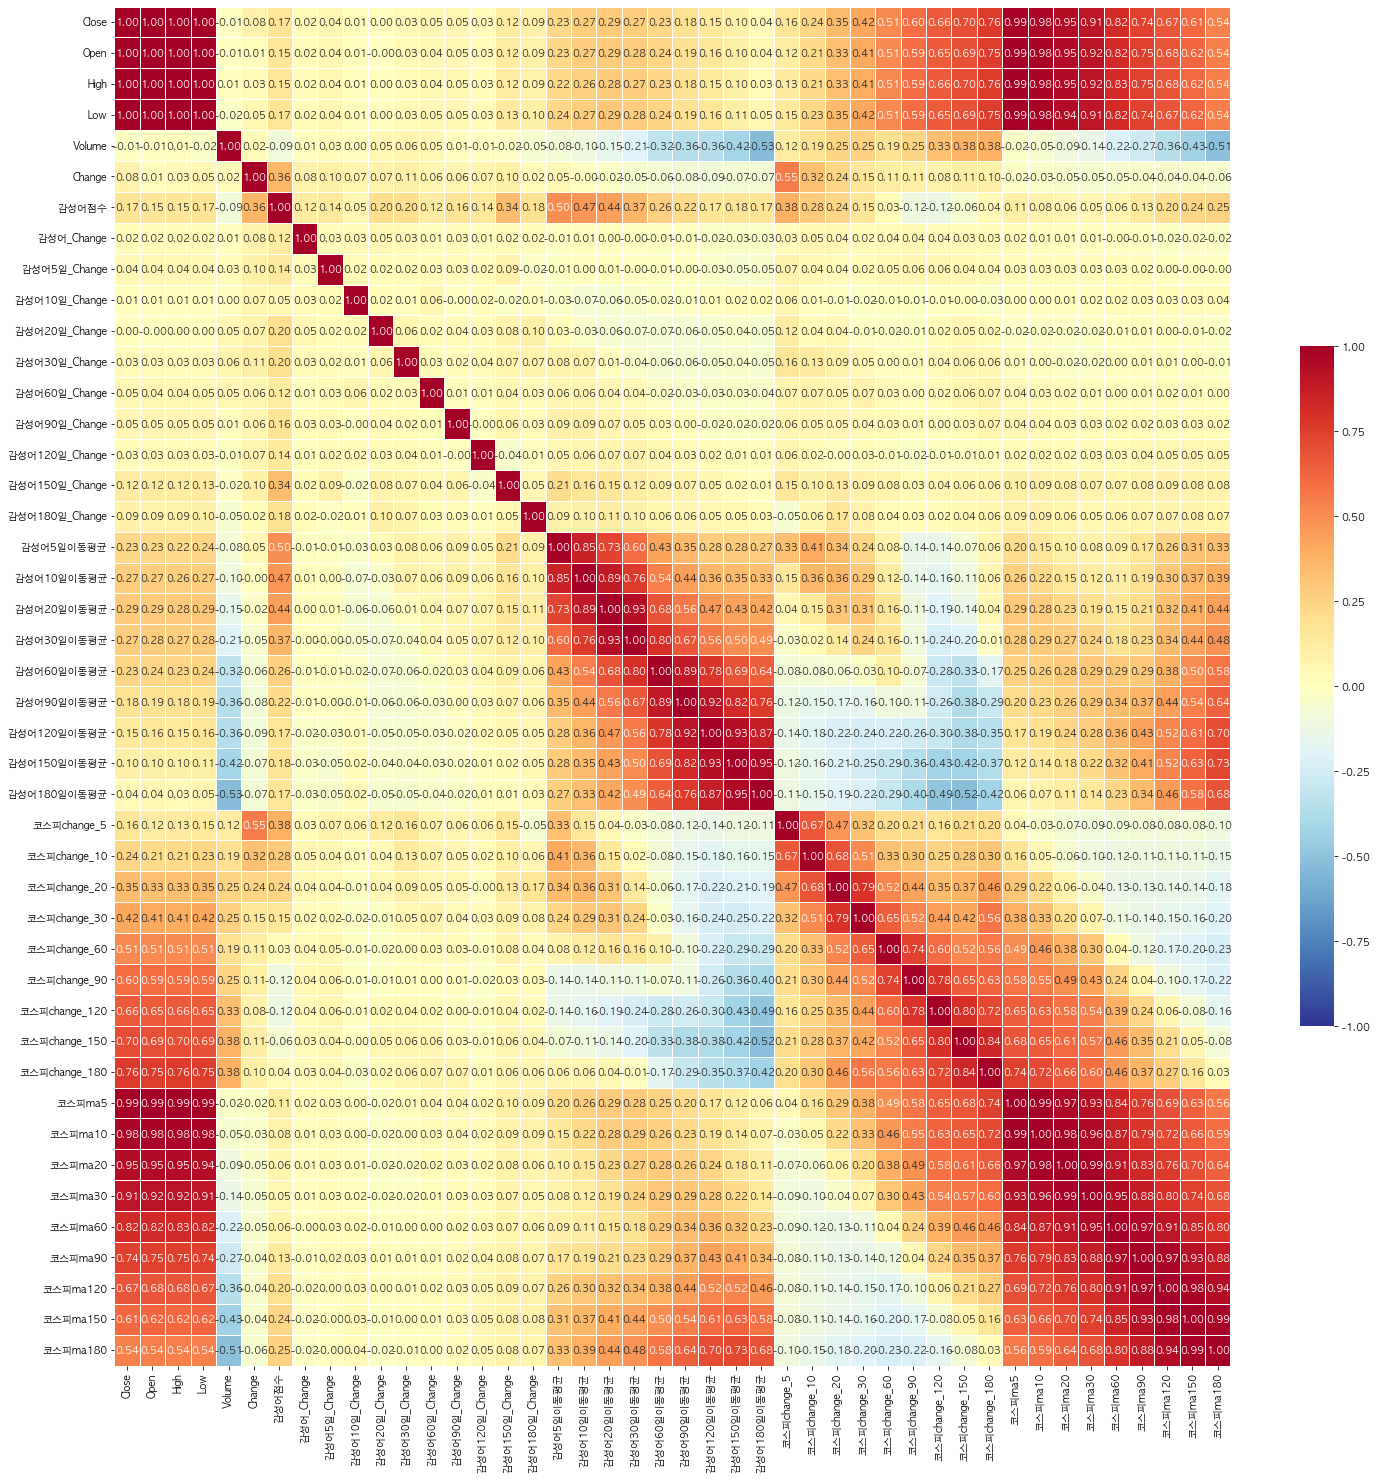

In [75]:
#heatmap으로 상관관계를 표시
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
rc('font', family='AppleGothic')

# 그림 사이즈 지정
fig, ax=plt.subplots( figsize=(25,25) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
# mask = np.zeros_like(df1.corr(), dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
plt.rcParams['axes.unicode_minus'] = False

# 히트맵을 그린다
sns.heatmap(df1.corr(), 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
#             mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1,   # 컬러바 범위 -1 ~ 1
            fmt = '.2f' # 소수점 2번째자리까지만 출력
           )  


In [ ]:
# 감성어5일 이동평균이 코스피 10일 변화율과의 상관관계가 0.41로 높게 나옴
# 감성어 180일 이동평균과 코스피 변화율 150일과의 상관관계는 -0.52로 음의 상관관계가 높게 나옴 

# 감성어 60일, 90일, 120일, 150일, 180일과 코스피 이동평균선 120일, 150일, 180일과 상관성이 높게 나왔음. 
   # 특히 감성어 150일 이동평균과 코스피 180일 이동평균이 +0.73 상관관계를 보이며 가장 높게 나옴. 

<AxesSubplot:>

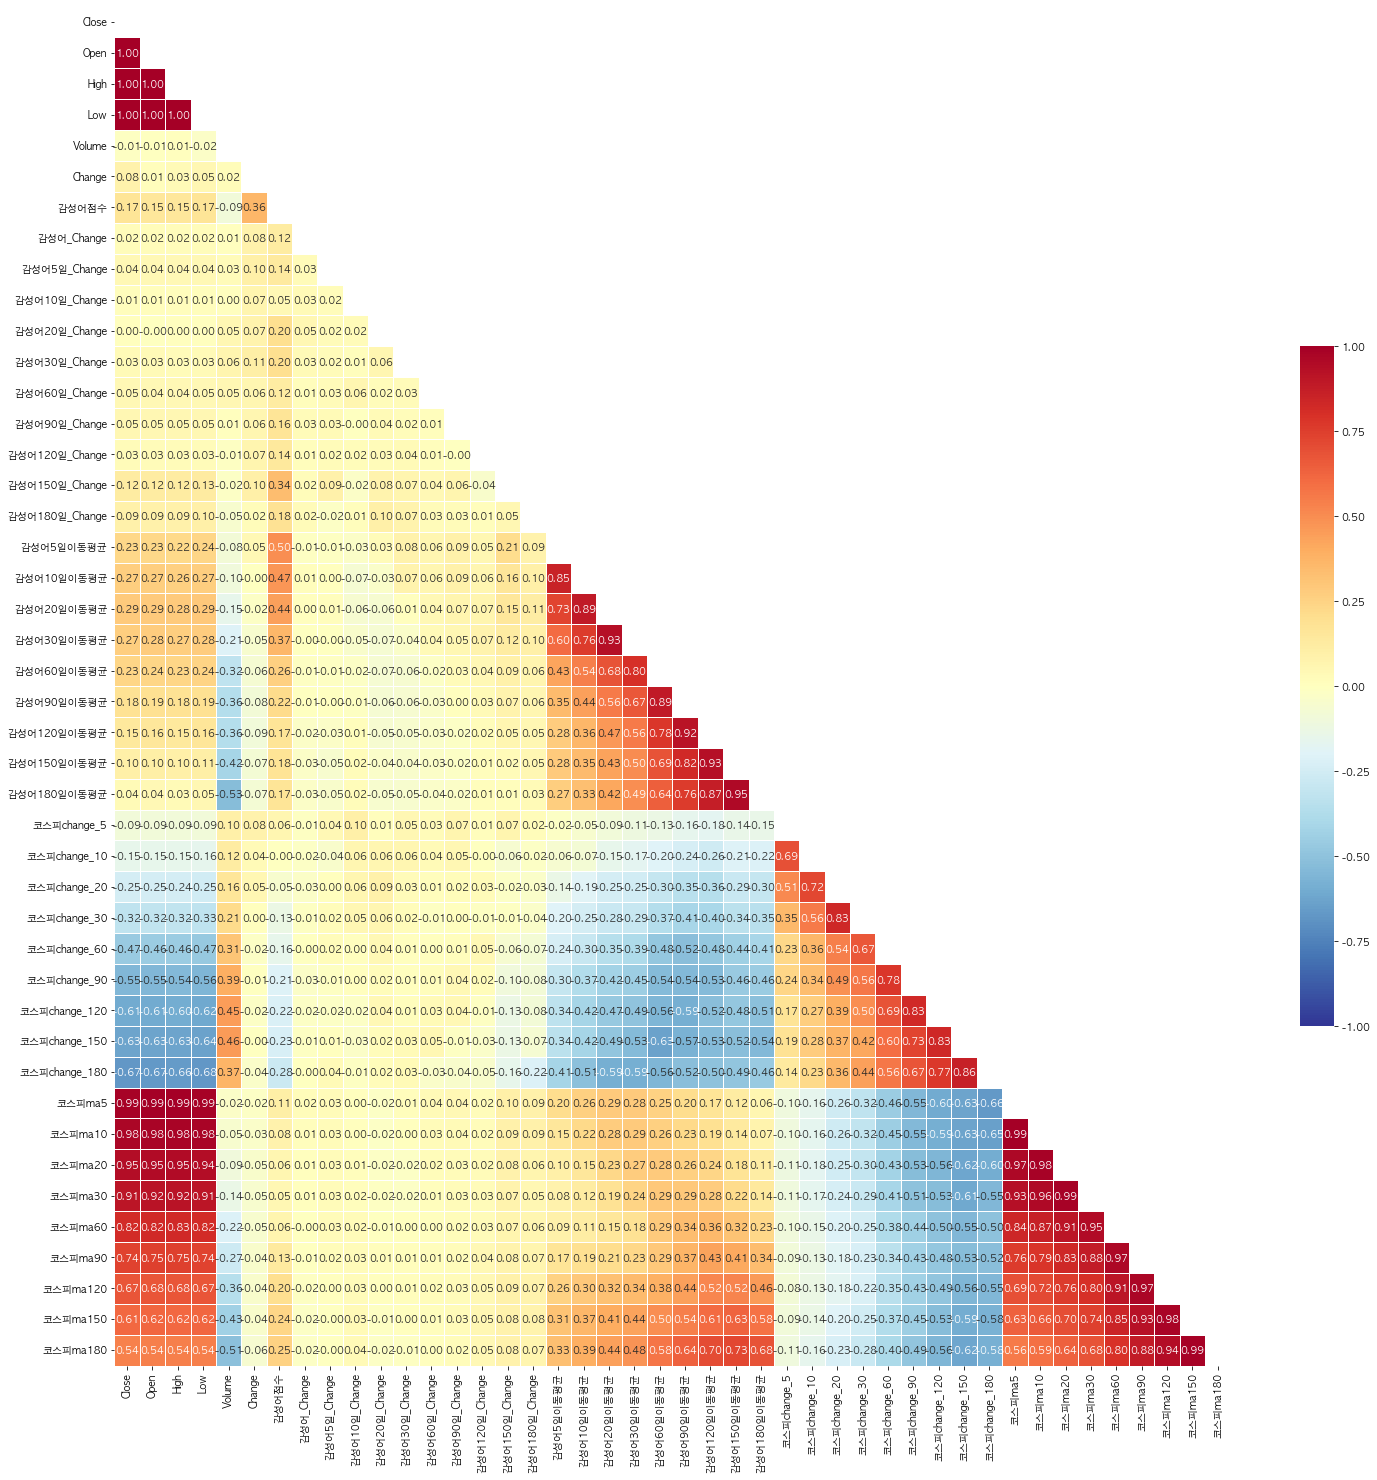

In [94]:
#heatmap으로 상관관계를 표시
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
rc('font', family='AppleGothic')

# 그림 사이즈 지정
fig, ax=plt.subplots( figsize=(25,25) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df1.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.rcParams['axes.unicode_minus'] = False

# 히트맵을 그린다
sns.heatmap(df1.corr(), 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1,   # 컬러바 범위 -1 ~ 1
            fmt = '.2f' # 소수점 2번째자리까지만 출력
           )  


# 상관관계가 높았던 감성어 120일평균과 종가와의 시간별 그래프 그리기

<AxesSubplot:xlabel='Date', ylabel='감성어120일평균'>

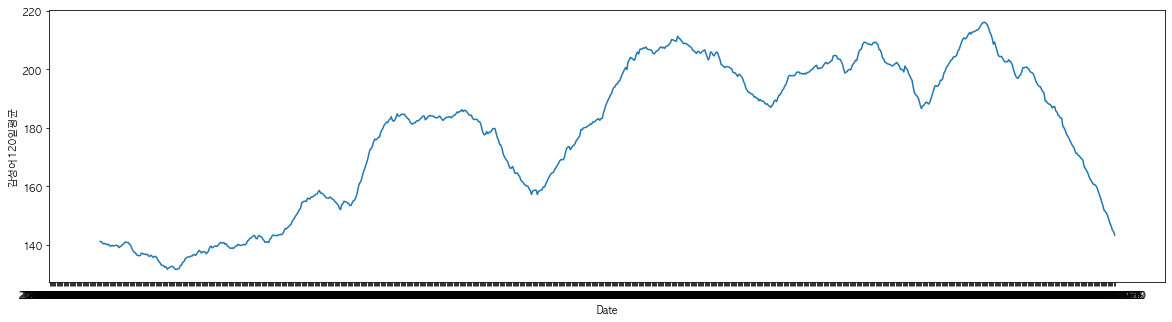

In [48]:
df날짜=df.copy()
plt.figure(figsize=(20,5))
sns.lineplot(x='Date', y='감성어120일평균', data=df날짜)

In [49]:
df비교=df.copy()
df비교.index=df비교['Date']
df비교=df비교[['Close','감성어120일평균']]

In [50]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df비교[:]=ss.fit_transform(df비교[:])
# df_장전_글로벌['글로벌_감성어표준화_장전'][:]=ss.fit_transform(df_장전_글로벌['글로벌_감성어점수_장전'][:])
df비교

Close  감성어120일평균
Date                           
2017-01-02 -1.064176        NaN
2017-01-03 -0.975624        NaN
2017-01-04 -0.967320        NaN
2017-01-05 -0.985667        NaN
2017-01-06 -0.950018        NaN
...              ...        ...
2020-12-23  2.583614  -1.231191
2020-12-24  2.817499  -1.266286
2020-12-28  2.826150  -1.324109
2020-12-29  2.885367  -1.343495
2020-12-30  3.148686  -1.391626

[981 rows x 2 columns]

In [51]:
df비교['Date']=df비교.index
df비교

Close  감성어120일평균        Date
Date                                       
2017-01-02 -1.064176        NaN  2017-01-02
2017-01-03 -0.975624        NaN  2017-01-03
2017-01-04 -0.967320        NaN  2017-01-04
2017-01-05 -0.985667        NaN  2017-01-05
2017-01-06 -0.950018        NaN  2017-01-06
...              ...        ...         ...
2020-12-23  2.583614  -1.231191  2020-12-23
2020-12-24  2.817499  -1.266286  2020-12-24
2020-12-28  2.826150  -1.324109  2020-12-28
2020-12-29  2.885367  -1.343495  2020-12-29
2020-12-30  3.148686  -1.391626  2020-12-30

[981 rows x 3 columns]

<AxesSubplot:xlabel='Date'>

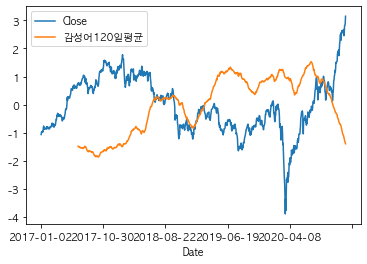

In [52]:
df비교.plot()

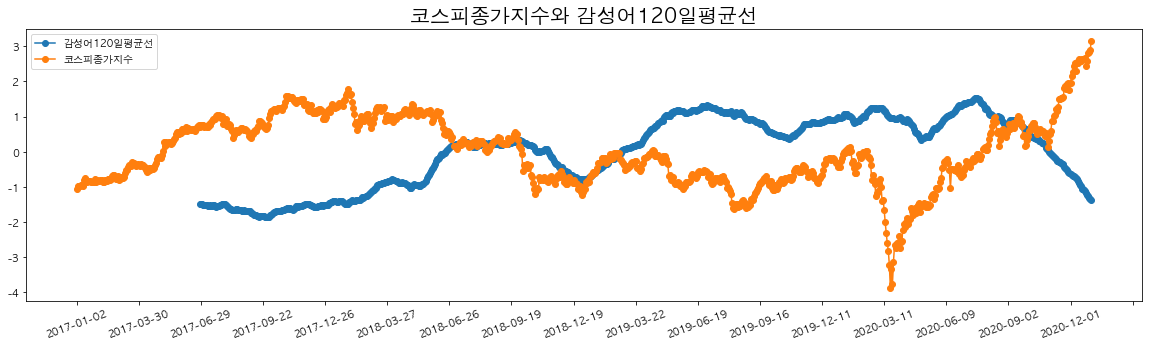

In [54]:
from matplotlib.ticker import MaxNLocator

plt.rcParams['axes.unicode_minus'] = False
fig=plt.figure(figsize=(20,5))
ax=fig.add_subplot()


ax.plot(df비교['Date'], df비교['감성어120일평균'], marker='o', label='감성어120일평균선')
ax.plot(df비교['Date'], df비교['Close'], marker='o', label='코스피종가지수')
ax.xaxis.set_major_locator(MaxNLocator(20))

ax.legend()

plt.title('코스피종가지수와 감성어120일평균선', fontsize=20)
plt.xticks(rotation=20)
plt.show()